<a href="https://colab.research.google.com/github/lmangnier/CRHs_Profil/blob/main/Atelier_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction générale  

En Sciences des données, les tâches principales peuvent se résumer autour de **deux** grandes problématiques, prédire ou inférer lorsque l'**issue est connue** ou regrouper des individus autour de **groupes homogènes**, à savoir l'apprentissage **supervisé** et **non-supervisé**.

- *Apprentissage supervisé*:  
De manière assez générale, l'apprentissage supervisé regroupe à la fois les tâches de **prédictions** et d'**inférence**, lorsque l'issue (continue ou discrète) est connue. La famille la plus connue des modèles d'apprentissage supervisé est la **régression**. Dans un contexte de prédiction, on peut chercher à prédire la valeur **continue** pour un individu, comme attribuer une classe à ce dernier lorsque l'issue est **discrète**.    
- *Apprentissage non-supervisé*:  
À contrario, l'apprentissage non-supervisé ne présume en rien de la connaissance de l'issue pour les individus, mais cherche plutôt à **regrouper** les individus autour de **groupes homogènes**. Ces méthodes forment dans la majeure partie des cas des "**clusters**" où les individus sont proches à l'intérieur d'un même cluster et différents entre des clusters différents.  


# Apprentissage supervisé  

# Modèles de Régression
En sciences de la santé, les modèles de régression sont des outils souples et puissants permettant de répondre à 2 objectifs principaux: la prédiction et l'infèrence.

Bien qu'un large choix de modèles soit disponible, couvrant un éventail larges de questions de recherche (régression paramétrique, non-paramétrique, variables continues, discrètes, données indépendantes, corrélées, etc...), les modèles de régression linéaires généralisés (ou GLM en anglais pour Generalized Linear Models) sont la famille de modèles les plus souvent employés en pratique. Dans un soucis de pédagogie, nous présenterons la régression linéaire en premier, pertinente lorsque la variable réponse est continue.

## Régression Linéaire
Supposons que l'on étudie le rôle de certains facteurs sur la pression systolique chez un ensemble de patients. On pourrait être intéressé par prédire la pression systolique  de patients (variable réponse) en fonction de leurs caractéristiques (covariables).
De manière assez intuitive la prédiction cherche "à deviner" la valeur de la pression systolique pour un individu suivant ses caractéristiques. D'un autre côte, on pourrait se poser une toute autre question, par exemple: "Quels facteurs impactent ma pression systolique?". Ici ce n'est plus la valeur de la pression systolique qui est d'intérêt, mais l'association qu'on les covariables avec la variable réponse. 

Cependant avant de rentrer dans la pratique, il convient de définir formellement le modèle de régression linéaire et ses **hypothèses**.

De manière générale, le modèle pour p variables peut s'écrire: 
$
y = \beta_0 + \sum_p \beta_pX_p + \epsilon
$  
Lorsque l'on veut quantifier de manière la plus fiable possible l'incertitude dans le cadre d'infèrences ou si l'on est intéressé par simuler un jeu de données proches des données observées, il est nécessaire de poser certaines hypothèses sur les termes d'erreur.  
i) la **normalité**: $\epsilon \sim N(0,\sigma^2I)$, de cette hypothèse découle les trois prochaines:  
ii) la **linéarité**  
iii) l'**homoscedasticité**  
iv) l'**absence de corrélation**.  

Passons dès maintenant à la pratique!

In [1]:
#Ici on fixe le germe aléatoire en vue de reproduire les résultats
set.seed(7654)

#On importe les données disponibles à https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
systo_data = read.table('/content/cardio_train.csv', header = T, sep = ';')
head(systo_data)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0
2,1,20228,1,156,85,140,90,3,1,0,0,1,1
3,2,18857,1,165,64,130,70,3,1,0,0,0,1
4,3,17623,2,169,82,150,100,1,1,0,0,1,1
5,4,17474,1,156,56,100,60,1,1,0,0,0,0
6,8,21914,1,151,67,120,80,2,2,0,0,0,0


In [2]:
#Les donnees comportent 70000 lignes (individus) et 13 colonnes (variables)
dim(systo_data)

[1] 70000    13

In [3]:
#Vérification des données et suppression des données négatives et valeurs aberrantes pour la pression systolique
summary(systo_data)

systo_data = systo_data[systo_data$ap_hi > 0 & systo_data$ap_hi < 200 ,]

       id             age            gender         height     
 Min.   :    0   Min.   :10798   Min.   :1.00   Min.   : 55.0  
 1st Qu.:25007   1st Qu.:17664   1st Qu.:1.00   1st Qu.:159.0  
 Median :50002   Median :19703   Median :1.00   Median :165.0  
 Mean   :49972   Mean   :19469   Mean   :1.35   Mean   :164.4  
 3rd Qu.:74889   3rd Qu.:21327   3rd Qu.:2.00   3rd Qu.:170.0  
 Max.   :99999   Max.   :23713   Max.   :2.00   Max.   :250.0  
     weight           ap_hi             ap_lo           cholesterol   
 Min.   : 10.00   Min.   : -150.0   Min.   :  -70.00   Min.   :1.000  
 1st Qu.: 65.00   1st Qu.:  120.0   1st Qu.:   80.00   1st Qu.:1.000  
 Median : 72.00   Median :  120.0   Median :   80.00   Median :1.000  
 Mean   : 74.21   Mean   :  128.8   Mean   :   96.63   Mean   :1.367  
 3rd Qu.: 82.00   3rd Qu.:  140.0   3rd Qu.:   90.00   3rd Qu.:2.000  
 Max.   :200.00   Max.   :16020.0   Max.   :11000.00   Max.   :3.000  
      gluc           smoke              alco           

In [4]:
#On recalcule l'âge en années pour favoriser l'interprétation
systo_data$age = systo_data$age/365

In [5]:
#Ajustons le modèle de régression linéaire
#Pour rappel ici on ajuste un modèle avec ap_hi comme variable réponse
linear_model = lm(ap_hi~age+gender+height+weight+cholesterol+gluc+smoke+alco+active+cardio, data=systo_data)

summary(linear_model)


Call:
lm(formula = ap_hi ~ age + gender + height + weight + cholesterol + 
    gluc + smoke + alco + active + cardio, data = systo_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-130.272   -9.323   -0.039    7.072   74.731 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 103.127441   1.416267  72.816  < 2e-16 ***
age           0.246865   0.009072  27.213  < 2e-16 ***
gender        1.855697   0.149221  12.436  < 2e-16 ***
height       -0.110611   0.008623 -12.827  < 2e-16 ***
weight        0.227734   0.004416  51.567  < 2e-16 ***
cholesterol   1.877494   0.100145  18.748  < 2e-16 ***
gluc         -0.153385   0.115713  -1.326 0.184989    
smoke         0.659067   0.232240   2.838 0.004543 ** 
alco          1.001973   0.278990   3.591 0.000329 ***
active        0.742494   0.148561   4.998 5.81e-07 ***
cardio       11.859703   0.125308  94.644  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standa

Arrêtons-nous un instant pour intépreter la sortie précédente. Ici plusieurs informations sont intéressantes à analyser: 

- **Estimé** 
- **Erreur-Type** 
- **Valeur-p**

**Point technique**: Prenons tout d'abord l'estimé. D'un point de vue purement technique, les estimés peuvent traditionnellement être obtenus par Moindres carrés ordinaires (OLS en anglais) ou par la méthode du maximum de vraisemblance (MLE en anglais). L'intuition derrière restent la même, optimiser (maximiser ou minimiser) une fonction objectif. Les deux méthodes convergent vers les mêmes résultats, seule la variance du modèle va différer.  

Maintenant en termes d'interprétation, l'estimé nous donne la variation de la variable réponse en unités pour l'augmentation d'1 unité de la variable considérée. Par exemple, la pression systolique augmente de 14.49 unités lorsque la fréquence cardiaque augmente d'1 unité supplémentaire.  

De son côté l'**erreur-type** est la valeur estimée de l'écart-type de l'estimé. 

Enfin la **valeur-p** dans ce contexte, nous permet de tester:  
- H0: $ \beta_p = 0$  
- H1: $ \beta_p \ne 0$

Pour être très concret voici comment l'obtenir:  


In [6]:
matrix_coefs = matrix(coef(linear_model), ncol=1)
matrix_stderror = matrix(sqrt(diag(vcov(linear_model))), ncol=1)

student_stats = (matrix_coefs - 0 )/matrix_stderror
#Equivalent à la 3ème colonne de la table renvoyée par le summary

2*pt(abs(student_stats), nrow(systo_data) -11,,lower.tail = F)


0.000000e+00
3.223437e-162
1.820526e-35
1.277995e-37
0.000000e+00
3.147403e-78
1.849893e-01
4.542793e-03
3.290957e-04
5.809314e-07
0.000000e+00


En définissant un seuil de significativité statistique de 5% (on obtient au maximum 5% de faux-positifs parmi tous les tests effectués), on a de l'**évidence statistique** que les variables poids, cholestérol et cardio soient associées **significativement** avec la pression systolique. 

*Attention*: La valeur-p n'est pas:  
- La probabilité que H0 soit vraie
- La valeur-p ne nous dit rien sur la force d'association d'une variable 
- La probabilité d'obtenir les résultats par la chance  

La valeur-p nous donne le niveau concordance des données avec un modèle théorique. "Ma valeur observée est-elle aussi au moins **extrême** que celle obtenue sour l'**hypothèse nulle**?"

Une approche **complémentaire** est de calculer et d'afficher les intervalles de confiance et de voir s'ils chevauchent la valeur nulle (ici 0).  
Le code ci-dessous nous permet de les calculer et de générer des graphiques à l'aide de la librairie *ggplot2*. 

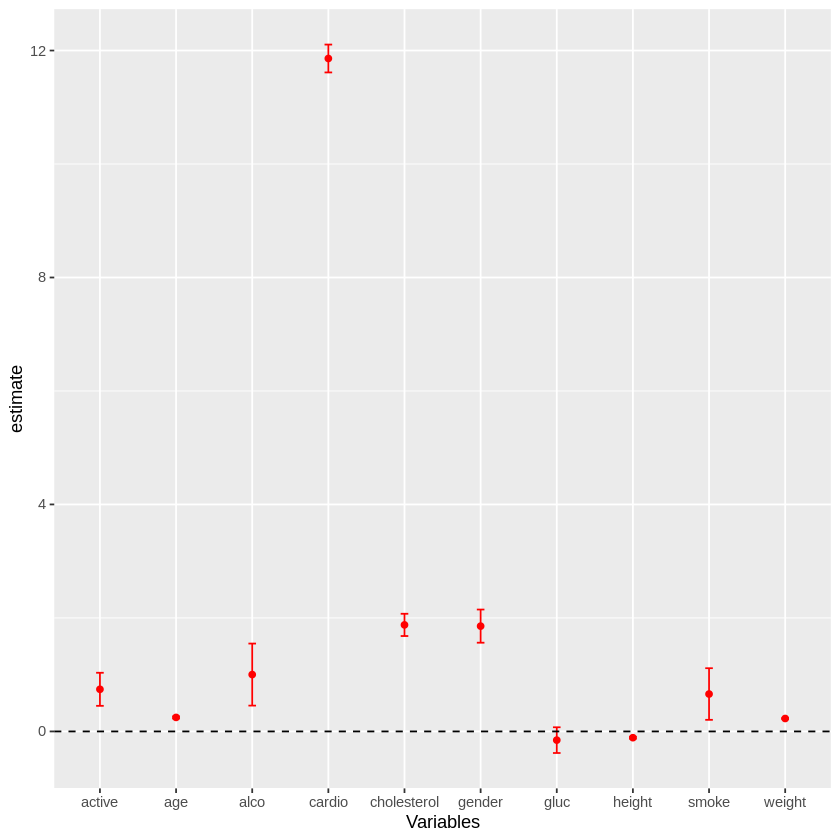

In [7]:
library(ggplot2, quietly=T)

estimates_with_CI = data.frame(cbind(coef(linear_model),2*pnorm(abs(student_stats ), lower.tail = F),confint(linear_model)))
colnames(estimates_with_CI) = c("estimate", "pvalue", "CI_lower", "CI_upper")
estimates_with_CI$variable_name = rownames(estimates_with_CI)

estimates_with_CI = estimates_with_CI[-1,]
ggplot(estimates_with_CI, aes(x=variable_name, y=estimate)) + geom_point(colour="red") + geom_errorbar(width=.1, aes(ymin=CI_lower, ymax=CI_upper), colour="red")+
geom_hline(yintercept = 0, linetype="dashed")+xlab("Variables")


Cependant, rappelez-vous, notre modèle de régression est basé sur des hypothèses fortes (normalité des résidus, homoscédasticité, linéarité, absence de corrélation).  
Qu'en est-il dans nos données ?


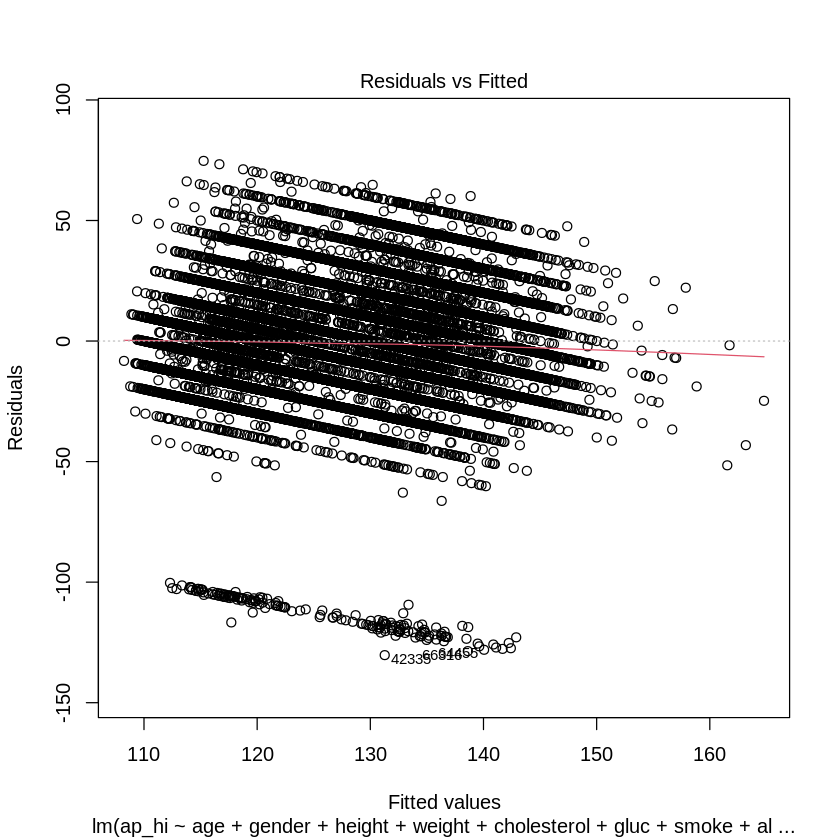

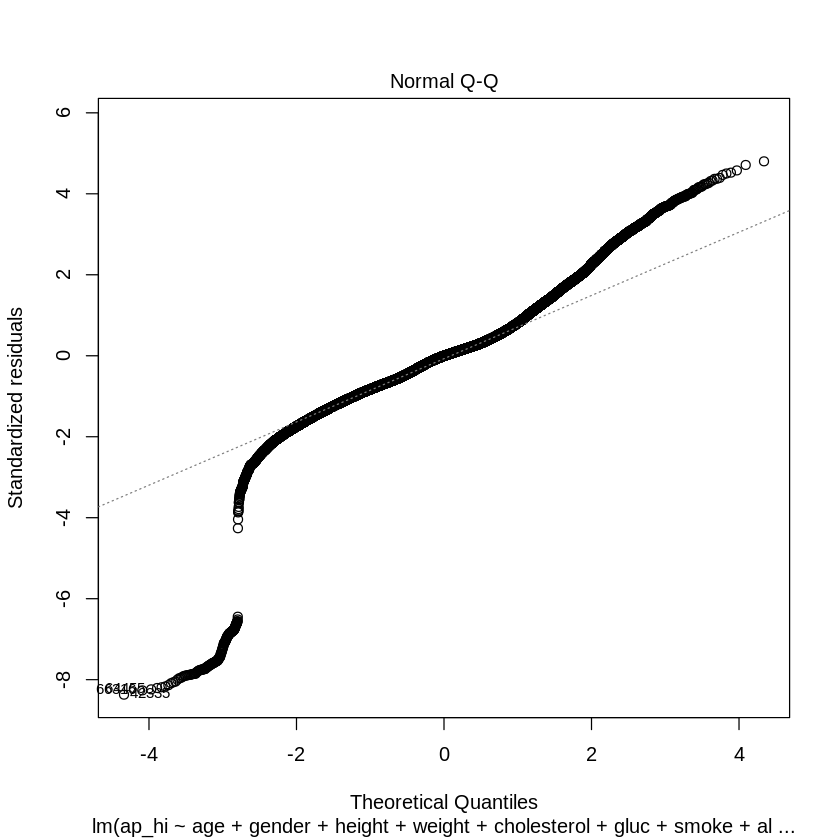

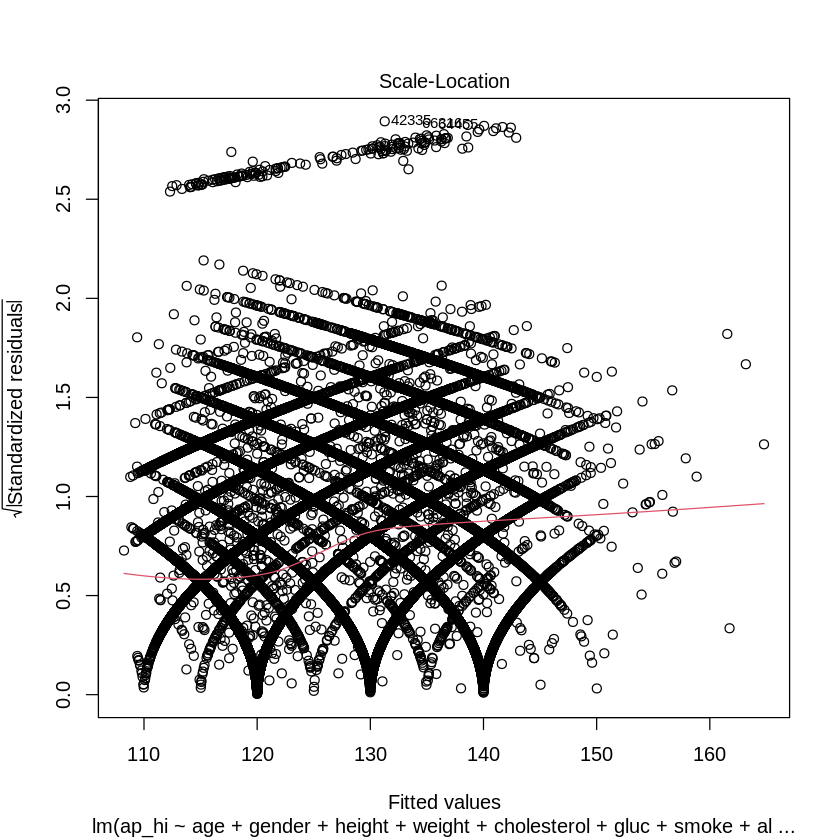

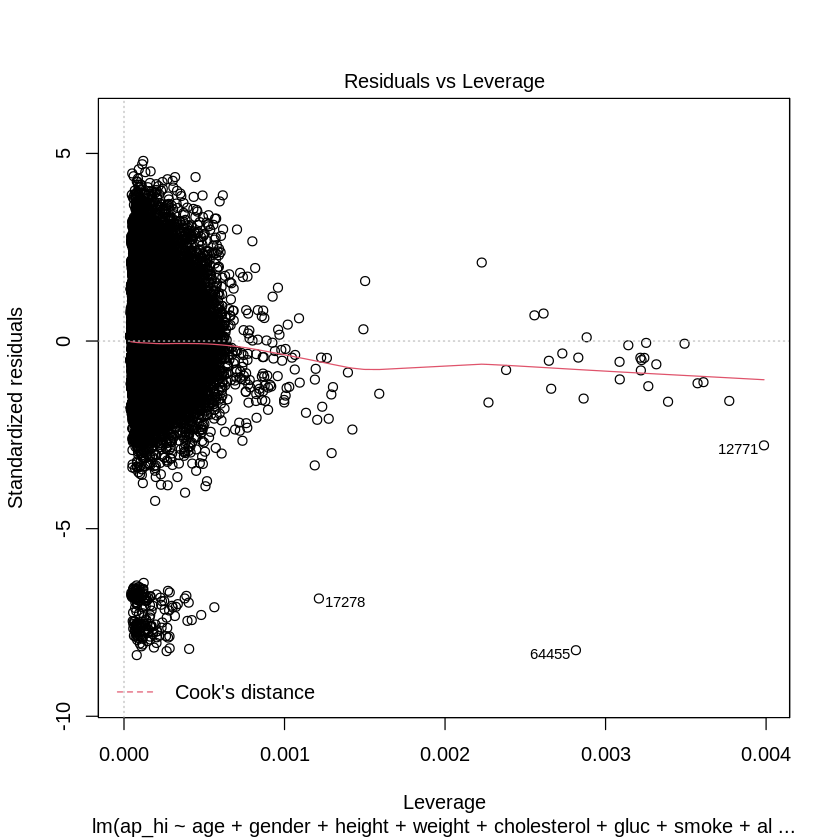

In [8]:
plot(linear_model)

Certaines valeurs extrêmes semblent écarter nos données des hypothèses. Tentons de les supprimer.

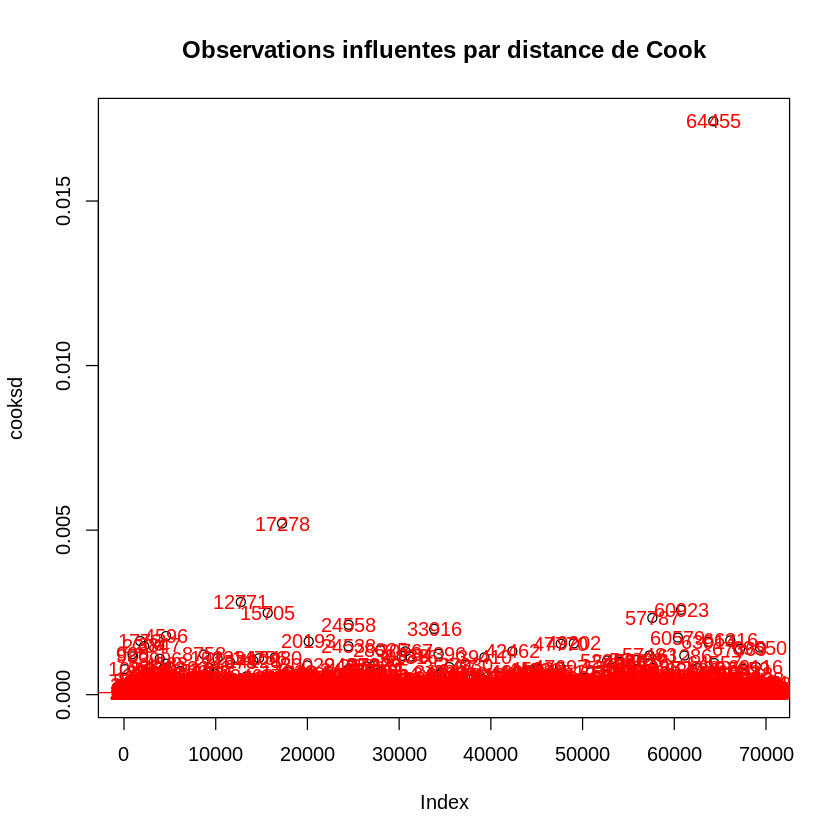

In [9]:
cooksd = cooks.distance(linear_model)
plot(cooksd, cex=1, main="Observations influentes par distance de Cook")  # plot cook's distance
abline(h = 4*mean(cooksd, na.rm=T), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""), col="red")  # add labels

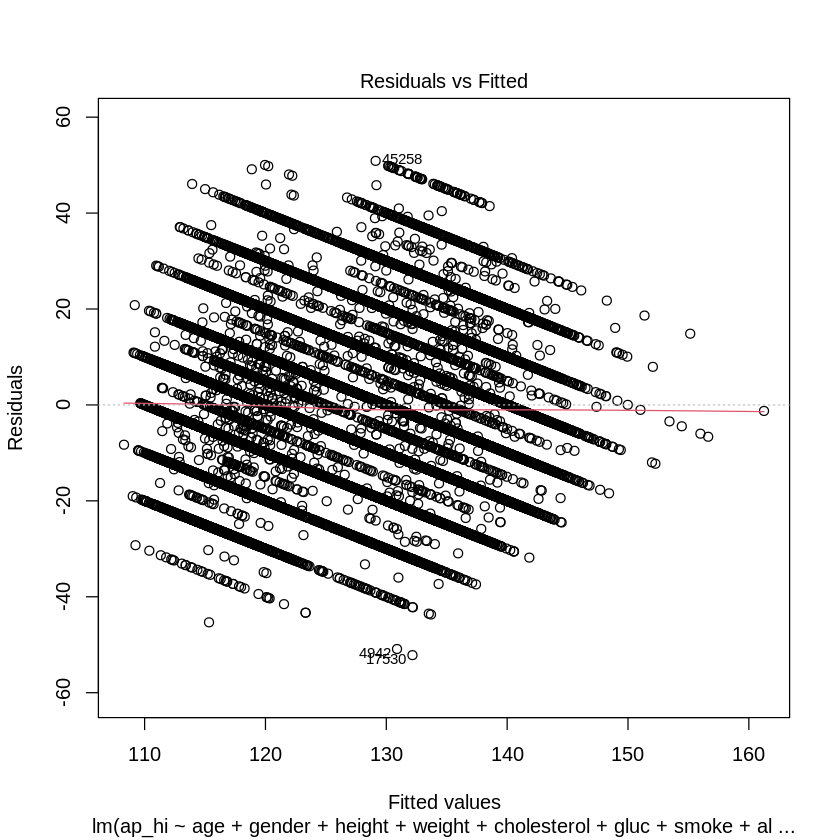

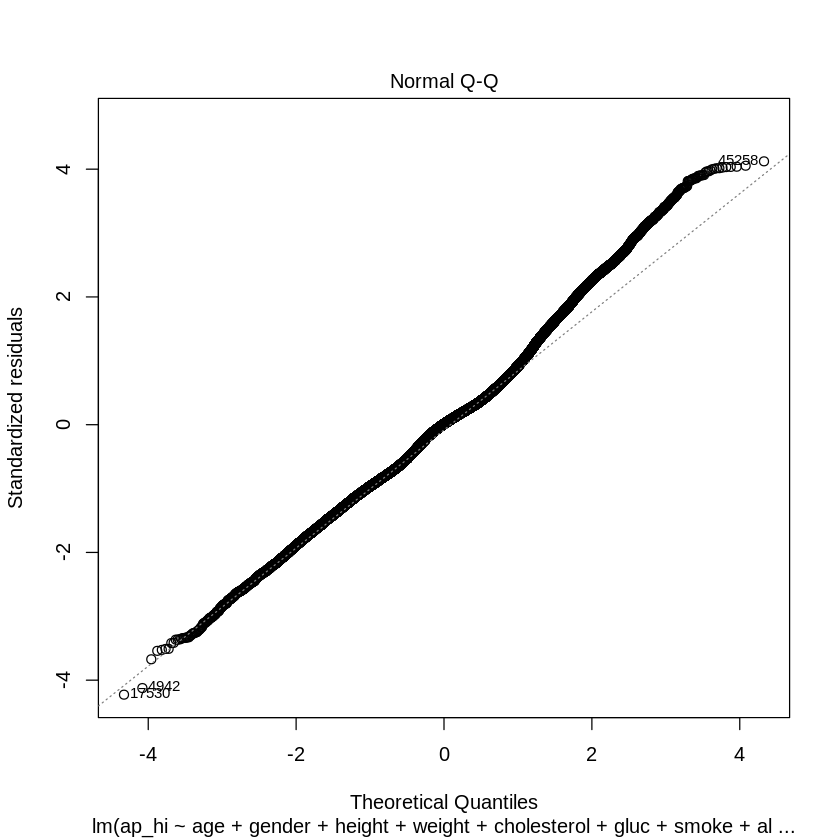

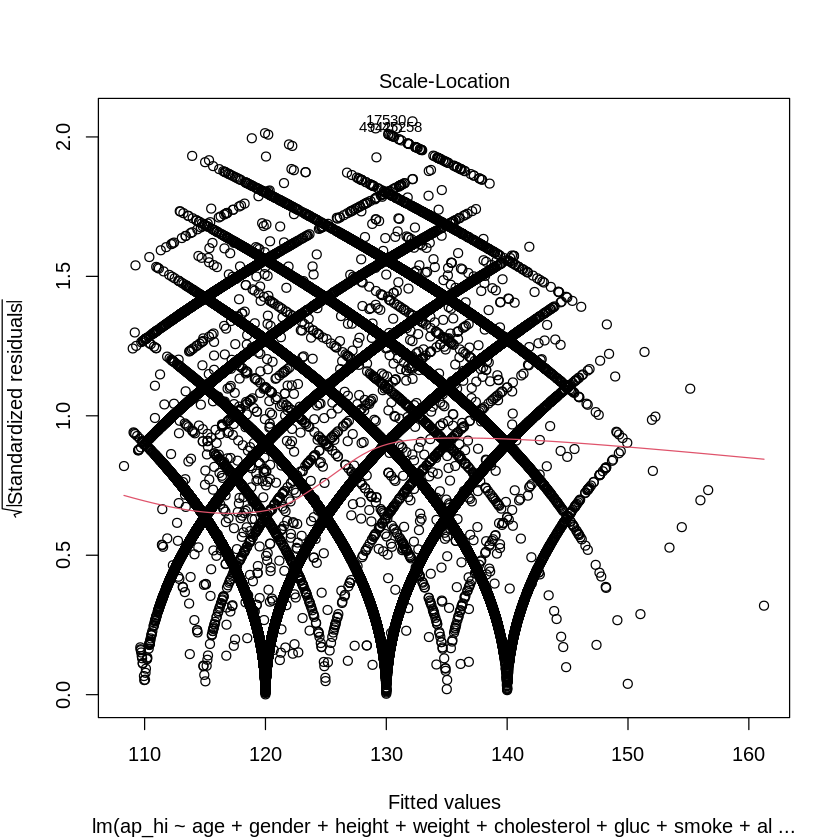

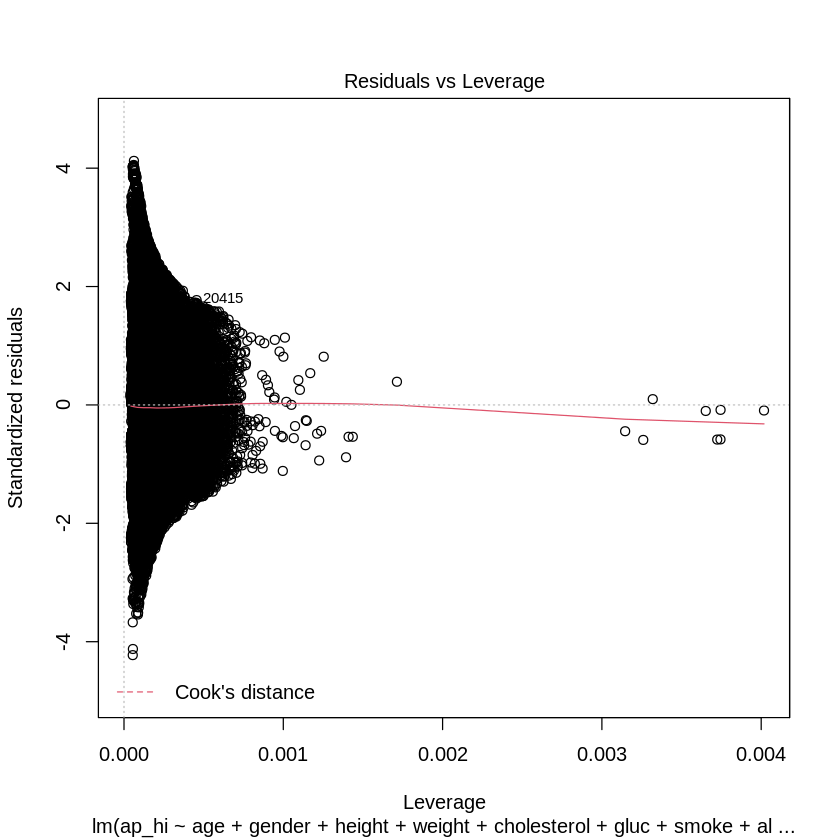

In [10]:
systo_data_without_outliers = systo_data[-which(cooksd>4*mean(cooksd, na.rm=T)),]

linear_model_without_outliers = lm(ap_hi~age+gender+height+weight+cholesterol+gluc+smoke+alco+active+cardio, data=systo_data_without_outliers)
plot(linear_model_without_outliers)

Maitenant dans un contexte **prédictif**, on cherche à prédire la valeur de la pression systolique sur la base de notre régression linéaire pour un nouvel individu. 

In [11]:
#Quelle est la valeur de la pression systolique pour une femme de 23 ans, de 170cm, 65 kilos, une pression diastolique de 12, ne faisant pas de cholesterol, ayant une glycemie normale, fumant, buvant de l'alcool et ne faisant pas d'activite physique, mais n'ayant pas de maladies cardiaques?

new_ind = data.frame("age"=23,"height"=170,"weight"=65,"gender"=1,"cholesterol"=1,"gluc"=1,
"smoke"=1,"alco"=1,"active"=0,"cardio"=0)

#y|X
round(predict(linear_model, new_ind),2)

1 
110.05

Mais de manière plus générale, le modèle est-il généralisable ?
Si l'on chercher à construire un modèle de prédiction, traditionnellement on va séparer le jeu de donnée en deux, un ensemble nécessaire à l'**entrainement du modèle** et un à sa **générabilité**, que l'on appelle ensemble de test.

In [12]:
sample_index_train = sample(1:nrow(systo_data), floor(0.7*nrow(systo_data)), replace = F)

train_systo = systo_data[sample_index_train,c("ap_hi","age","gender","height","weight","cholesterol","gluc","smoke","alco","active","cardio")]
test_systo = systo_data[-sample_index_train,c("ap_hi","age","gender","height","weight","cholesterol","gluc","smoke","alco","active","cardio")]

model_systo_train = lm(ap_hi~age+gender+height+weight+cholesterol+gluc+smoke+alco+active+cardio, train_systo)

#Calcul de l'erreur moyenne au carrée pour évaluer la performance du modèle

y_hat = as.matrix(test_systo)%*%as.matrix(coef(model_systo_train), ncol=1)
floor(mean((test_systo$ap_hi - y_hat)^2))


[1] 167725099

## Régression Logistique

La régression linéaire est utile lorsque la variable réponse est continue. Cependant lorsque celle-ci est dichotomique (0 ou 1), la régression logistique sera une alliée plus intéressante. Elle rentre dans la catégorie des modèles de classification vus plus haut.

Avant de rentrer directement dans la pratique, il convient encore une fois de déterminer formellement ce qu'est une régression logistique. De manière générale, le modèle peut s'écrire sous la forme:  

$ logit(P(y_i=1|X_i;\beta)) = X_i\beta$

Ici on cherche plus à prédire une valeur pour la variable réponse mais plutôt à prédire la probabilité de succès. Pour illustrer notre exemple, crééons une nouvelle variable pour la pression systolique.

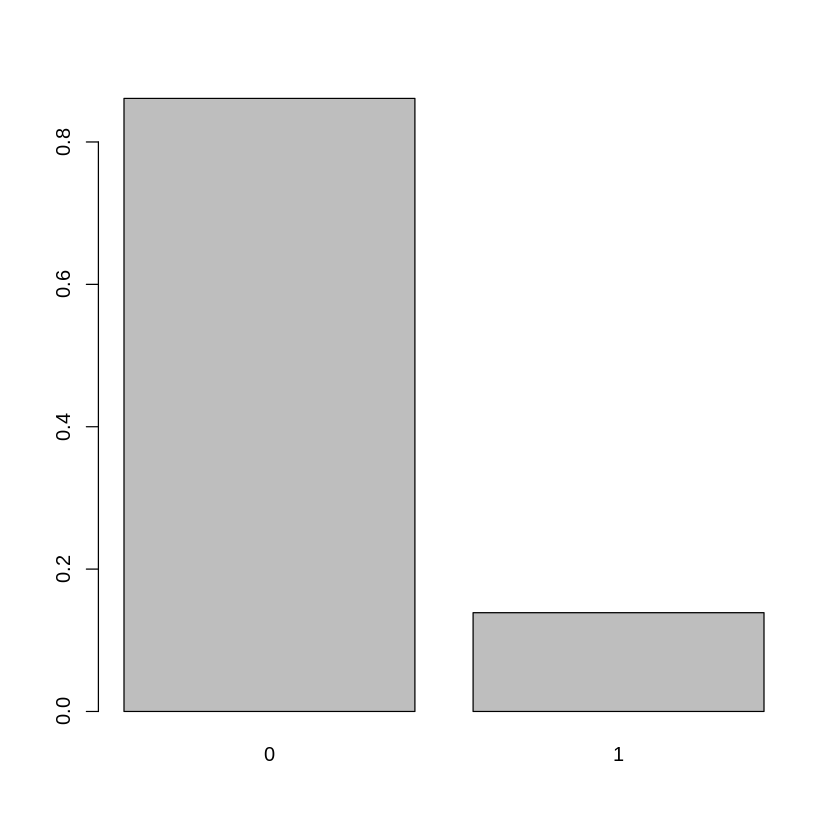

In [13]:
systo_data$ap_hi_binary = ifelse(systo_data$ap_hi>140, 1,0)

barplot(table(systo_data$ap_hi_binary)/sum(table(systo_data$ap_hi_binary)))

In [14]:
logistic_model = glm(ap_hi_binary~age+gender+height+weight+cholesterol+gluc+smoke+alco+active+cardio, data=systo_data, 
family=binomial(link="logit"))

summary(logistic_model)


Call:
glm(formula = ap_hi_binary ~ age + gender + height + weight + 
    cholesterol + gluc + smoke + alco + active + cardio, family = binomial(link = "logit"), 
    data = systo_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3893  -0.6539  -0.3017  -0.2337   3.0160  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.4378882  0.2753122 -12.487  < 2e-16 ***
age          0.0235093  0.0018694  12.576  < 2e-16 ***
gender       0.2468959  0.0293385   8.415  < 2e-16 ***
height      -0.0207950  0.0016456 -12.636  < 2e-16 ***
weight       0.0242604  0.0007859  30.872  < 2e-16 ***
cholesterol  0.1181582  0.0168795   7.000 2.56e-12 ***
gluc        -0.0150950  0.0205265  -0.735 0.462103    
smoke        0.0815943  0.0439667   1.856 0.063479 .  
alco         0.1904803  0.0509912   3.736 0.000187 ***
active       0.1735932  0.0296880   5.847 5.00e-09 ***
cardio       1.8497048  0.0312988  59.098  < 2e-16 ***
---
Signif. codes:  0 ‘**

Comment interpréter ce résultat ? À vous de jouer ! 

**Point technique**: Techniquement parlant, les estimés sont calculés sur la base des méthodes numériques maximisant la fonction de vraisemblance (Newton-Raphson ou Fisher-Scoring).

Contrairement au modèle de régression linéaire vu précédemment, les coefficients ont une interprétation différente dans le sens où ils s'expriment en termes de "rapports de côte". Cependant voici comment les interpréter en pratique:  
- Si le coefficient $\beta_p>0$ alors la variable a un effet positif sur l'issue et augmentera la probabilité d'observer un succès. Inversement si $\beta_p < 0$, la variable aura un effect négatif et diminuera la probabilité d'observer un succès.  
-  Si la variable d'intérêt augmente d'une unité, alors la côte sera multipliée par exp($\beta_p$). On parle de rapport de côtes, car exp($\beta_p$) calcule la côte pour $x_i = x +1$ sur la cote pour $x_i = x$.  

Ainsi si l'on veut les rapports de côtes en lien avec la sortie précédente, il suffit d'appliquer la fonction exponentielle aux coefficients. On peut generer calculer les intervalles de confiance de la même manière que précèdement.



In [15]:
logistic_CI = confint(logistic_model)

logistic_estimates_with_CI = data.frame("estimate"=exp(coef(logistic_model)), "CI_lower" = exp(logistic_CI[,1]), "CI_upper" = exp(logistic_CI[,2]))
logistic_estimates_with_CI$Variables = rownames(logistic_estimates_with_CI)

Waiting for profiling to be done...



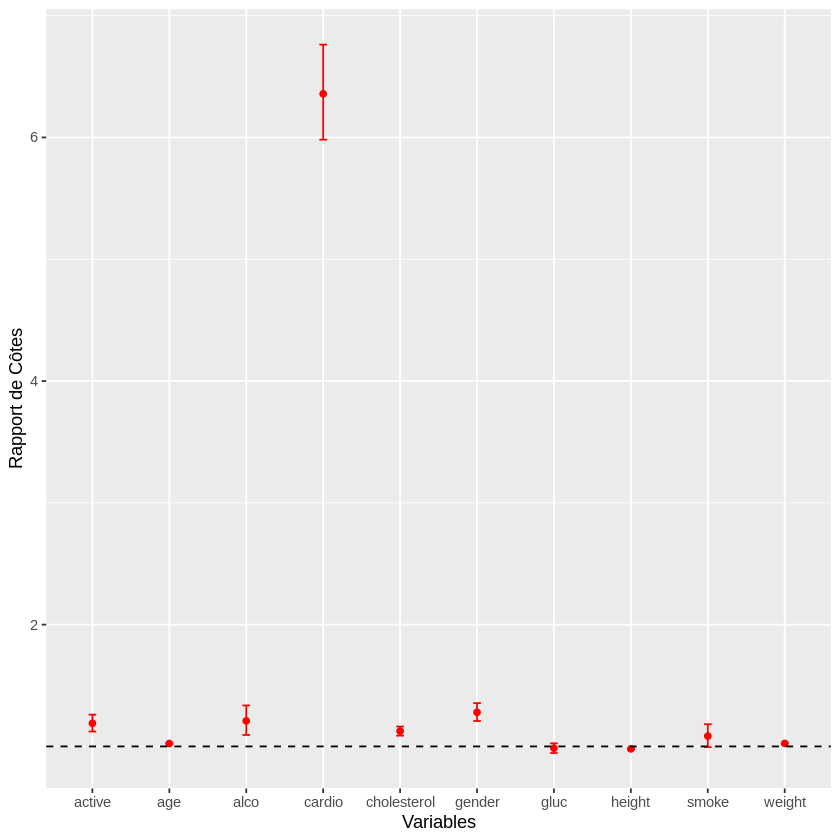

In [16]:
logistic_estimates_with_CI = logistic_estimates_with_CI[-1,]
ggplot(logistic_estimates_with_CI, aes(x=Variables, y=estimate)) + geom_point(colour="red") + geom_errorbar(width=.1, aes(ymin=CI_lower, ymax=CI_upper), colour="red")+
geom_hline(yintercept = 1, linetype="dashed")+xlab("Variables")+ylab("Rapport de Côtes")

Sur la base de la figure précédente, quelles variables semblent avoir un effet sur la présence d'une pression systolique forte chez un individu ?

**NB**: À la différence du modèle linéaire où l'on peut exprimer la performance explicative d'un modèle à travers le R carré, dans le cadre des modèles linéaires généralisés, la performance explicative va se faire grâce à la fonction de déviance.  
Intuitivement, la déviance calcule la différence entre le modèle saturé et le modèle nul (sans covariables). 

On peut cependant calculer un pseudo R-carré pouvant être interprété dans une approche similaire au R-carré en régression linéaire. Ici pseudo-R2 de Mac-Fadden. 

In [17]:
logistic_null_model = glm(ap_hi_binary~1, data=systo_data, 
family=binomial(link="logit"))
1 - (logLik(logistic_model)/logLik(logistic_null_model))

'log Lik.' 0.1393136 (df=11)

Le modèle logistique contraint la valeur prédite à se situer entre 0 et 1 (probabilité).  
Cependant dans le cadre d'un modèle de classification, il convient de déterminer sur la base de cette probabilité à quelle classe appartient l'individu. En addition des métriques vues précédemment, il peut être instructif d'analyser d'autres métriques. 




In [18]:
predict_probas = as.vector(predict(logistic_model, type="response"))
predict_probas = ifelse(predict_probas>.5,1,0)

table(systo_data$ap_hi_binary ,predict_probas)

   predict_probas
        0     1
  0 59938   160
  1  9574   110

also installing the dependency ‘plyr’


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = systo_data$ap_hi_binary, predictor = as.vector(fitted.values(logistic_model)),     percent = F, ci = TRUE, plot = TRUE, boot.n = 1000, ci.alpha = 0.9,     stratified = FALSE, grid = TRUE, show.thres = TRUE, legacy.axes = TRUE,     reuse.auc = TRUE, print.auc = TRUE, print.thres.col = "blue",     ci.type = "bars", print.thres.cex = 0.7, main = paste("ROC curve using",         "(N = ", nrow(aSAH), ")"))

Data: as.vector(fitted.values(logistic_model)) in 60098 controls (systo_data$ap_hi_binary 0) < 9684 cases (systo_data$ap_hi_binary 1).
Area under the curve: 0.7659
95% CI: 0.7615-0.7703 (DeLong)

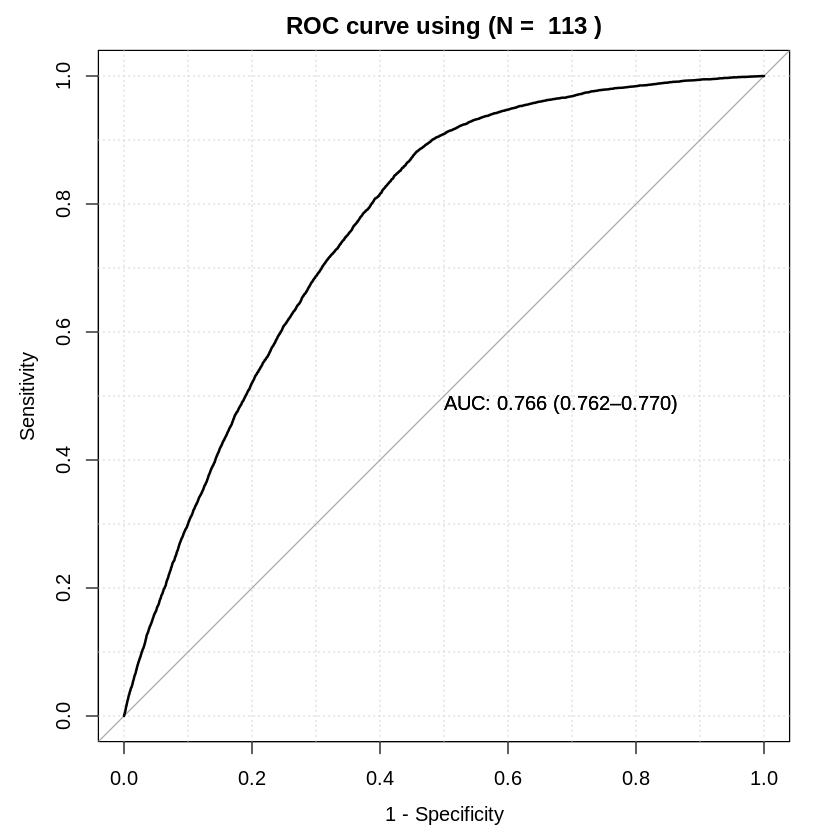

In [19]:
install.packages("pROC", quiet=T)
library(pROC, quietly=T)

roc(systo_data$ap_hi_binary, as.vector(fitted.values(logistic_model)), percent=F,   boot.n=1000, ci.alpha=0.9, stratified=FALSE, plot=TRUE, grid=TRUE, show.thres=TRUE, legacy.axes = TRUE, reuse.auc = TRUE,
print.auc = TRUE, print.thres.col = "blue", ci=TRUE, ci.type="bars", print.thres.cex = 0.7, main = paste("ROC curve using","(N = ",nrow(aSAH),")"))

En utilisant les mêmes données que précèdemment, nous sommes capables de définir la probabilite que Y=1 pour notre individu.

In [20]:
proba_new_ind = round(predict(logistic_model, new_ind, type="response"),2)
proba_new_ind
#Depuis que la probabilite est inferieure a 0.5 (seuil de coupure), on peut assumer que l'individu ne presente pas une 
#pression systolique elevee.

1 
0.01

## Régression de Poisson  
Maintenant que faire lorsque la variable réponse n'est ni continue ni dichotomique ? 
Dans certains cas, la variable réponse peut répresenter un compte, par exemple lorsque l'on cherche à modéliser le nombre de contacts que peut avoir un individu malade dans un contexte d'épidémie ou le nombre de fois qu'un basketteur tir durant un quart temps.

La régression de Poisson adresse parfaitement ce genre de problématique.  

Formellement le modèle s'écrit:  
$log(E(Y|X)) = X\beta$

Pour ce type de régression, nous avons besoin de simuler par nous-mêmes des données de compte sur la base d'une loi de Poisson.



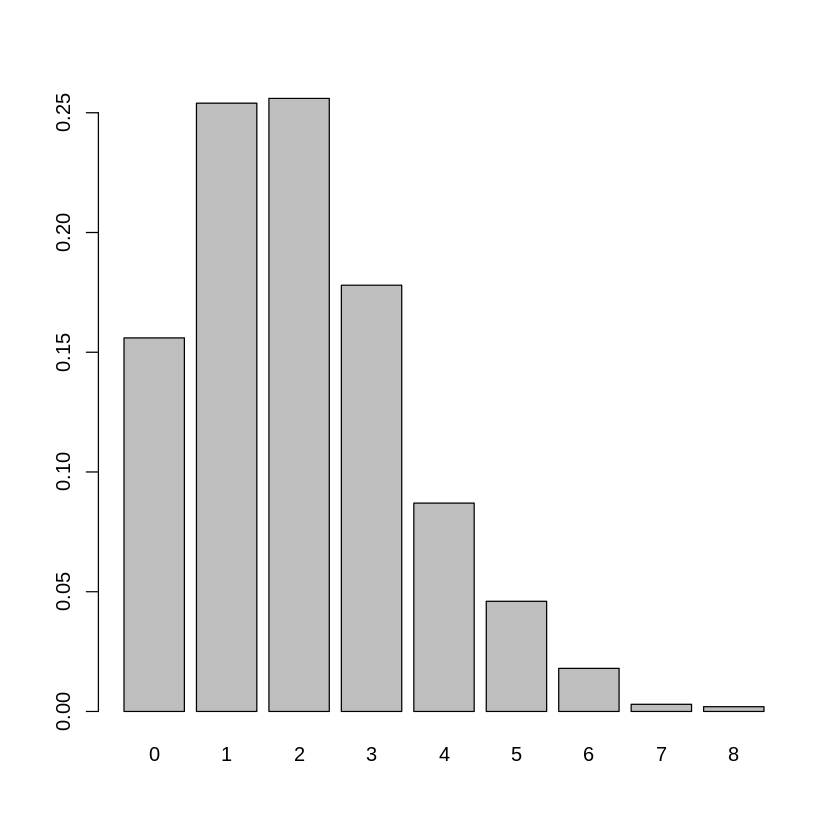

In [21]:
count_data = rpois(1000, lambda = 2)
x = count_data + rnorm(1000)

poiss_data = data.frame("y" = count_data, "x" = x)
barplot(table(count_data)/sum(table(count_data)))

In [22]:
summary(glm(y~x, poiss_data, family = poisson(link="log")))


Call:
glm(formula = y ~ x, family = poisson(link = "log"), data = poiss_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.20816  -0.49730   0.00506   0.40858   2.06036  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.07303    0.04103   -1.78   0.0751 .  
x            0.30952    0.01118   27.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1272.9  on 999  degrees of freedom
Residual deviance:  555.8  on 998  degrees of freedom
AIC: 2798.8

Number of Fisher Scoring iterations: 5


Ici l'interprétation des estimateurs est assez similaire à celle obtenue pour le modèle de régression linéaire. À la seule différence qu'ici la variable réponse augmente de X% pour l'augmentation d'1 unité de la variable explicative.

Dans notre cas Y augmente de 30% lorsque x augmente de 1 unité.  

Pour récapituler: 

### Forces:  
- Puissant
- Versatile 
- Interprétabilité
- Implémentation dans tous les languages de programmation  

### Faiblesses:  
- Ne tiennent pas compte d'effets non-linéaires
- Reposent sur des hypothèses fortes  

## Pour approfondir
- Équations d'estimation généralisées  
- Modèles linéaires mixtes  
- Régressions pénalisées: LASSO, Ridge, Elastic-Net 
- Régressions non-paramétriques (GAM)  

In [ ]:
system('sudo apt-get install -y librsvg2-dev', intern=TRUE)
system('sudo apt-get install libnlopt-dev', intern=TRUE)

# Apprentissage non-supervisé

# Méthodes de regroupement  

À travers la section précédente nous avons vu comment modéliser une relation entre des variables dans un contexte d'inférence ou de prédiction.  
Cependant, d'autres questions quant à la structure des données peuvent se révéler pertinentes. En outre, répondre à la question "Sommes-nous capables de distinguer des groupes d'individus proches ?". Pour adresser ces questions de regroupement plusieurs approches sont disponibles, ici nous presenterons les 3 méthodes traditionnelles, à savoir l'**Analyse en composantes principales** (ACP), le **clustering hiérarchique** et enfin l'approche des **K-Moyennes**.  

Pour vous donner un peu d'intuition, les méthodes de regroupement (ou clustering) cherchent à maximiser la similarité des individus à l'intérieur d'un même groupe et minimiser la similarité entre individus de groupes différents.  



In [ ]:
#install.packages("cluster", quiet=T)
#install.packages("FactoMineR", quiet=T)
#install.packages("factoextra", quiet=T)
#install.packages("gridExtra", quiet=T)
library(cluster, quietly=T)
library(factoextra, quietly=T)
library(FactoMineR, quietly=T)
library(gridExtra, quietly=T)

## Analyse en Composantes Principales (ACP)  

L'**ACP**  est une approche de réduction de la dimension qui propose de "résumer" l'information des variables en crééant des "nouvelles variables" décorrélées les unes des autres. Cette méthode en plus d'offrir la capacité de **réduire la nombre de variables** à analyser, va supprimer toute **collinéarité** pouvant exister dans les données initiales.  

À titre didactique, nous allons utiliser les données de criminalité aux USA pour l'année 1973 (disponible dans R). 

In [26]:
arrests_USA = USArrests
head(arrests_USA)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


Une bonne pratique est de standardiser les données (centrer-réduire).  


In [27]:
arrests_USA_std = apply(arrests_USA, 2, function(X) (X - mean(X)) / sd(X))

summary(arrests_USA_std)
print("##################################################################")
apply(arrests_USA_std, 2, sd)

     Murder           Assault           UrbanPop             Rape        
 Min.   :-1.6044   Min.   :-1.5090   Min.   :-2.31714   Min.   :-1.4874  
 1st Qu.:-0.8525   1st Qu.:-0.7411   1st Qu.:-0.76271   1st Qu.:-0.6574  
 Median :-0.1235   Median :-0.1411   Median : 0.03178   Median :-0.1209  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.7949   3rd Qu.: 0.9388   3rd Qu.: 0.84354   3rd Qu.: 0.5277  
 Max.   : 2.2069   Max.   : 1.9948   Max.   : 1.75892   Max.   : 2.6444  

[1] "##################################################################"


Murder  Assault UrbanPop     Rape 
       1        1        1        1

In [28]:
PCA_analysis_variables = prcomp(arrests_USA_std)

PCA_analysis_individuals = prcomp(t(arrests_USA_std))
explained_variance_ind =  PCA_analysis_individuals$sdev^2/sum(PCA_analysis_individuals$sdev^2)

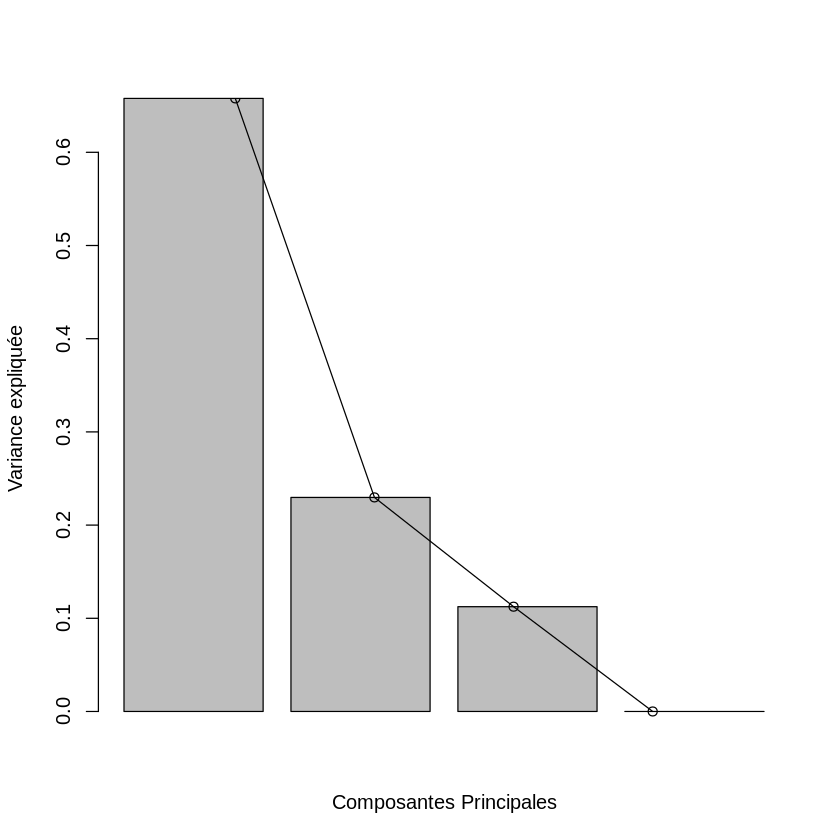

In [29]:
barplot(explained_variance_ind, xlab="Composantes Principales", ylab="Variance expliquée")
lines(1:4, explained_variance_ind)
points(1:4, explained_variance_ind)

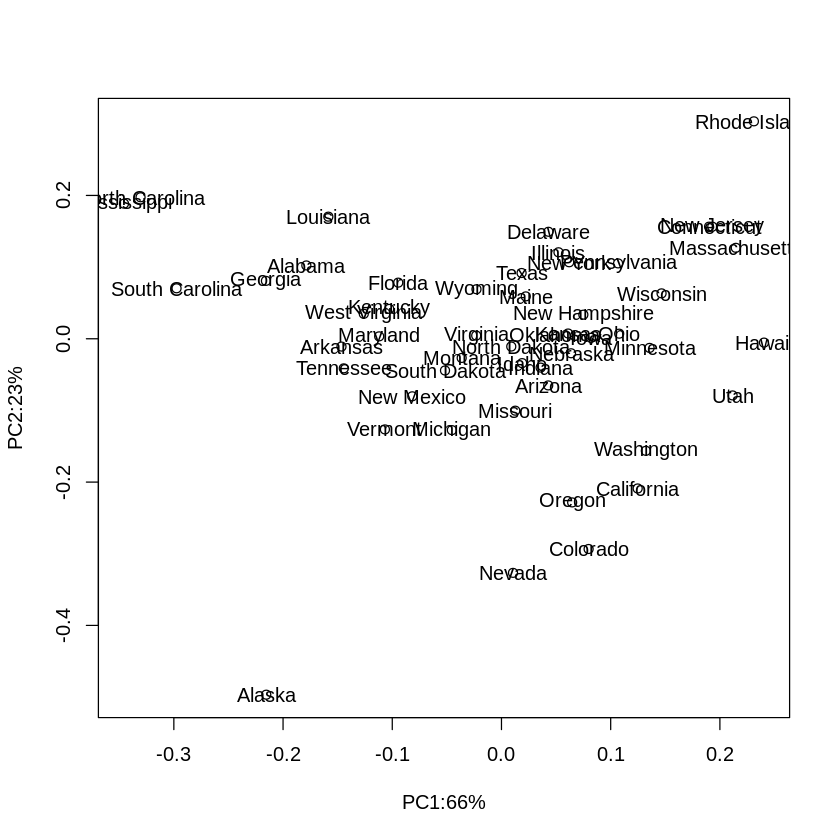

In [30]:
plot(PCA_analysis_individuals$rotation[,1], PCA_analysis_individuals$rotation[,2], xlab=paste0("PC1:", round(explained_variance_ind[1],2)*100,"%"), ylab=paste0("PC2:", round(explained_variance_ind[2],2)*100,"%"))
text(PCA_analysis_individuals$rotation[,1], PCA_analysis_individuals$rotation[,2], rownames(arrests_USA_std))

Le package FactoMineR combiné à la librairie de visualisation factoextra permet de faire les étapes vues précédemment de manière automatisée.

In [31]:
PCA_with_facto = PCA(arrests_USA_std)

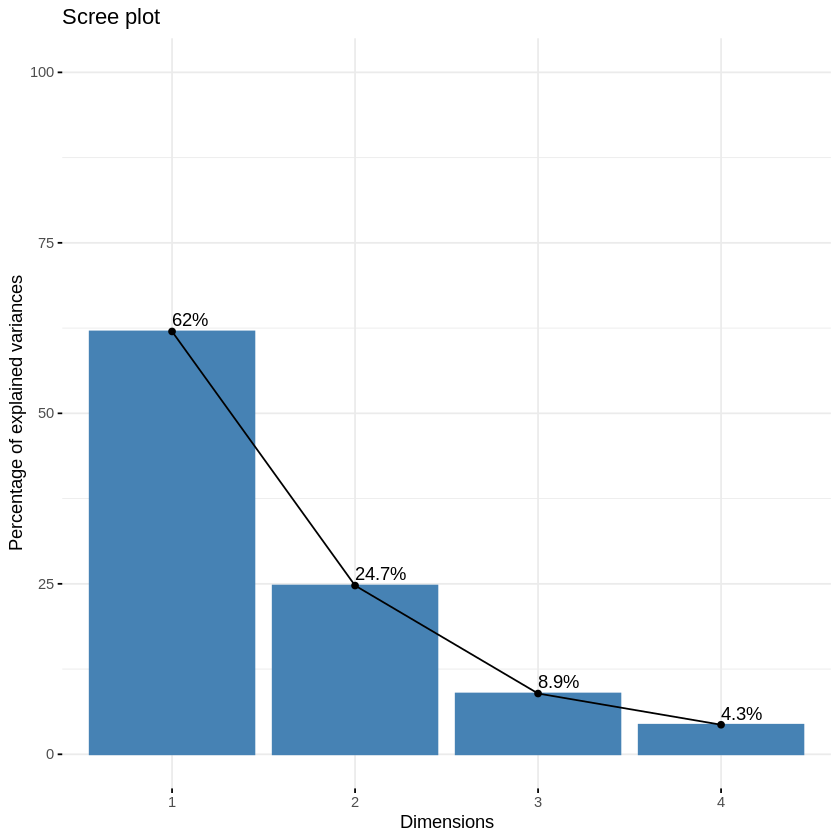

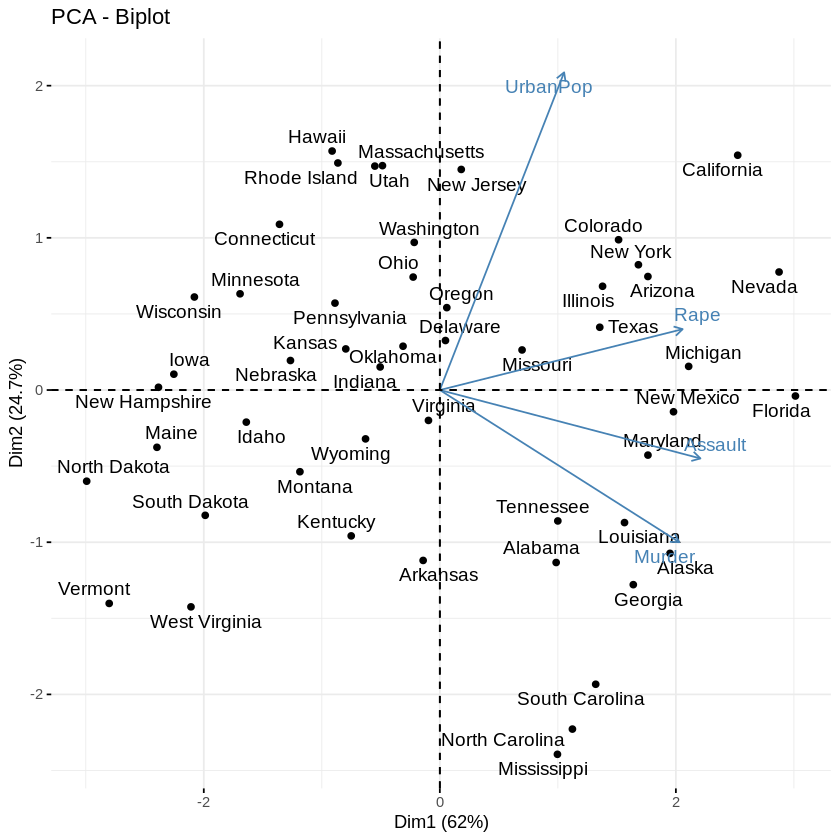

In [32]:
fviz_screeplot(PCA_with_facto, addlabels = TRUE, ylim = c(0, 100))
fviz_pca_biplot(PCA_with_facto, repel = TRUE)

## Extension de l'ACP à d'autres types de données  

Comme vous l'aurez remarqué, l'ACP s'applique à des données continues, cependant lorsque vous devez travailler sur des données discrètes ou mixtes (continues + discrètes), d'autres approches ont été proposées généralisant l'ACP, telles que l'**Analyse des Correspondances Multiples** (ACM) ou l'**Analyse Factorielle Multiple** (AFM).  

Pour résumer: 

### Forces:  
- Interprétabilité 
- Facilité d'implémentation
- Puissant lorsque les relations entre variables sont linéaires

### Faiblesses:  
- Pertes d'information
- Ne tient pas compte de relations non-linéaires

## Clustering Hierarchique  

Le Clustering Hiérarchique a une approche différente de l'ACP. Ici on ne cherche plus à résumer l'information autour de composantes principales, mais plutôt à chercher des individus qui sont proches. C'est à dire d'un point de vue statistique, des individus pour lesquelles la distance est minimale. 

Comme nous le verrons plus tard, le choix et de la distance et du critère de liaison est déterminant dans la structure des groupes.  



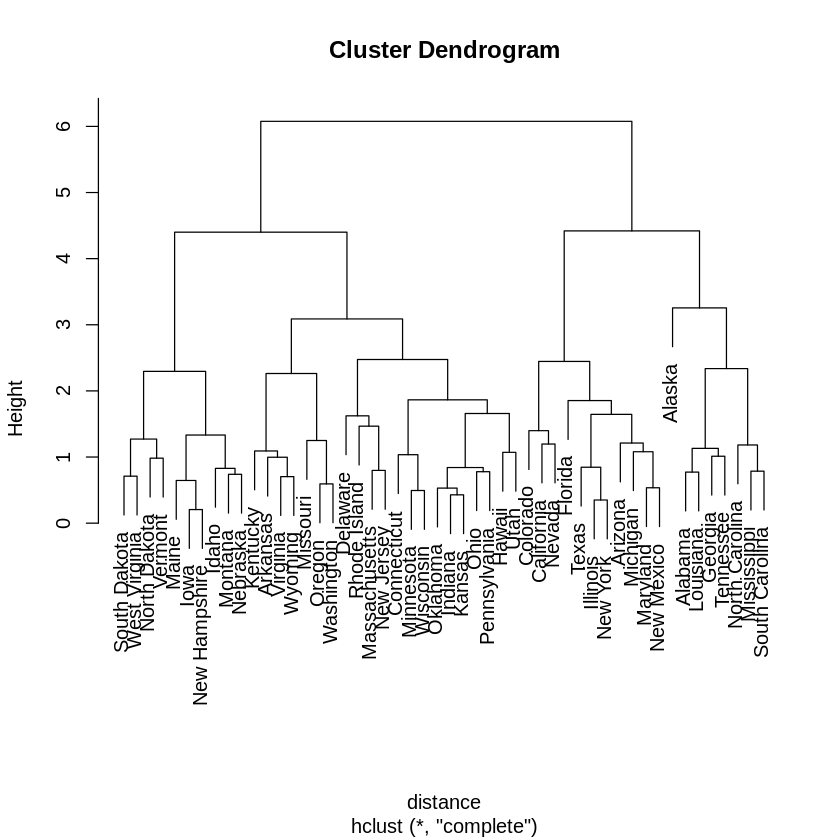

In [33]:
#Dans un premier temps, on calcule la distance au regard de la métrique considérée
#L'option method peut être changée au besoin
distance = dist(arrests_USA_std, method="euclidean")


clusters = hclust(distance, method="complete")

#Génération du dendogramme
plot(clusters)

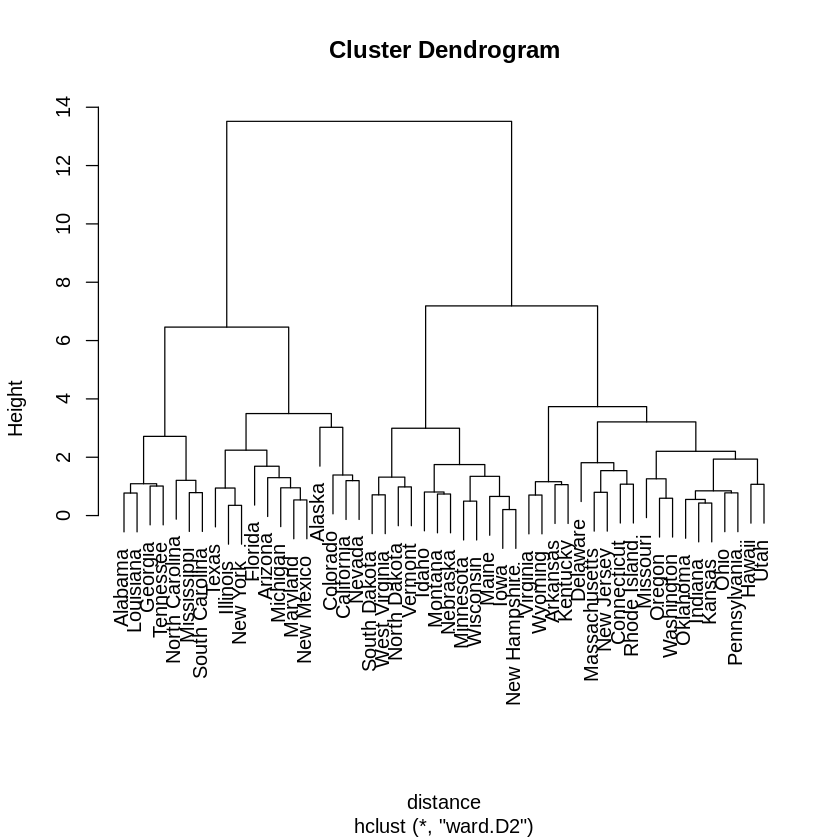

In [34]:
#L'option method peut être changée au besoin: manhattan, maximum
#distance = dist(arrest_USA_std, method="maximum")

#method="single"
clusters = hclust(distance, method="ward.D2")
plot(clusters)

Maintenant que l'on a nos groupes, comment former des groupes cohérents ?

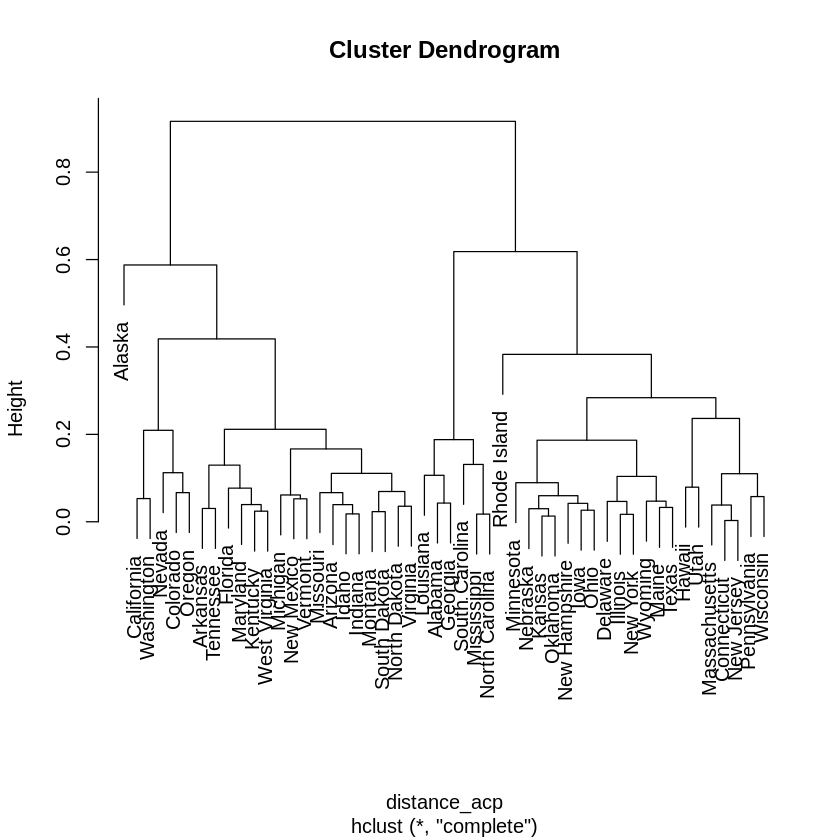

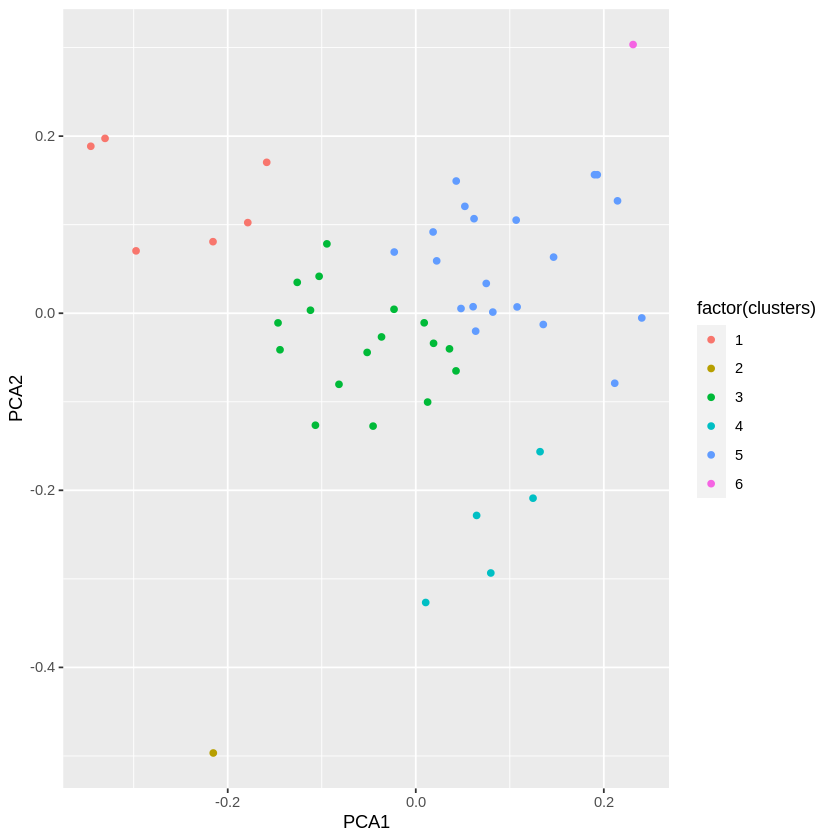

In [35]:
#On peut combiner ACP + Hclust pour trouver des groupes proches

distance_acp = dist(PCA_analysis_individuals$rotation[,1:2], method="euclidean")

clusters_acp = hclust(distance_acp, method="complete")
plot(clusters_acp)

cut_tree_acp = cutree(clusters_acp, h=0.3)
df_clusters_acp = data.frame("clusters" = cut_tree_acp, "PCA1" = PCA_analysis_individuals$rotation[,1], "PCA2" = PCA_analysis_individuals$rotation[,2])

ggplot(df_clusters_acp, aes(x=PCA1, y=PCA2, colour=factor(clusters)))+geom_point()

Pour résumer:  

### Forces:  
- Intuitif  
- Approche graphique  

### Faiblesses:  
- Dépendance aux critères de distance et de similarité
- Pas de critères uniques de création des clusters

## Approche des K-Moyennes  

À l'instar du clustering hiérarchique, l'approche des K-Moyennes propose de regrouper les individus proches au sein de mêmes groupes. Cependant la procédure est un peu différente. En effet, nous devons **passer explicitement le nombre de groupes** à la méthode pour que celle-ci attribue les individus à l'un ou l'autre des groupes.  

De manière un peu plus formelle, on tenter d'attribuer chaque observation à un groupe en **minimisant** la distance avec le centroïde du groupe. Pour le dire autrement, on cherche à minimiser la variance **intra-cluster** et maximiser la variance **inter-cluster**. La méthode est **itérative** et il convient en pratique de définir plusieurs points de départ (centroïdes potentiels) pour atteindre une segmentation  "optimale". 

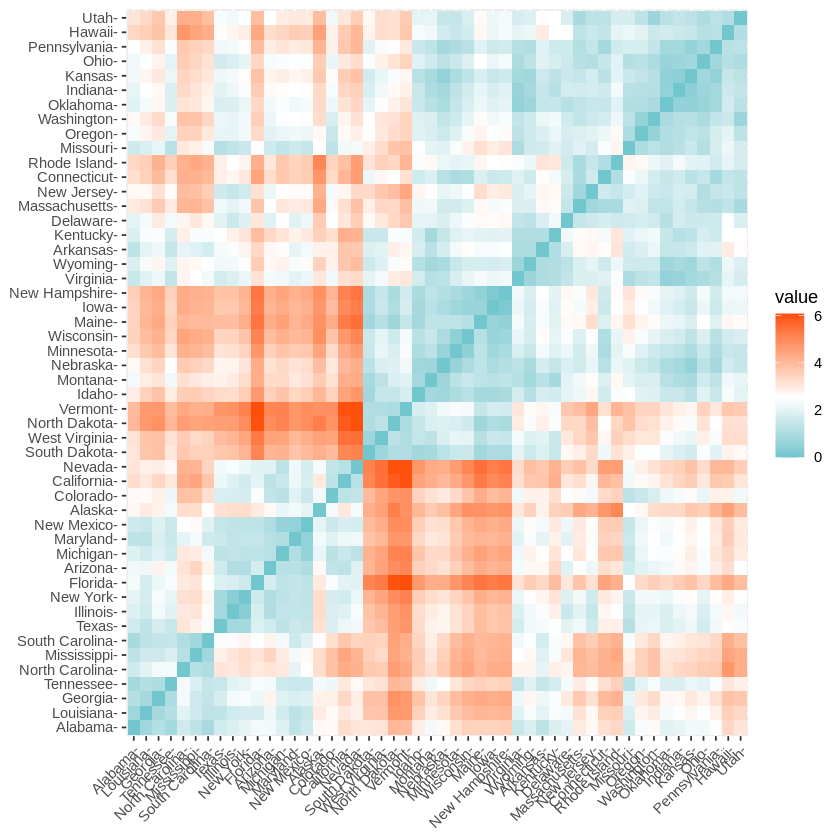

In [36]:
distance = get_dist(arrests_USA_std)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

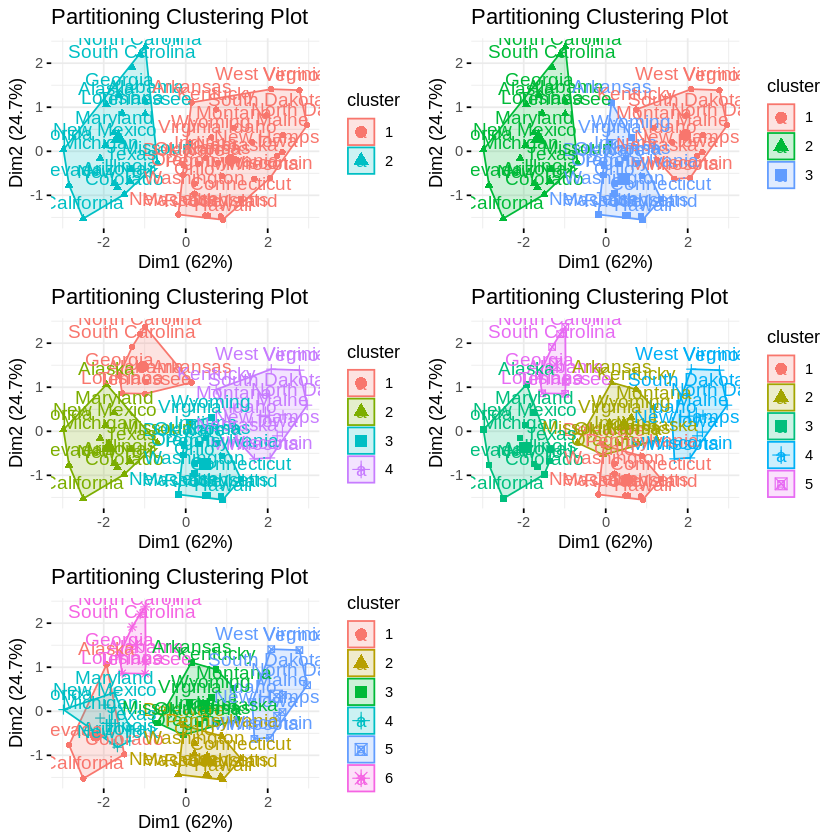

In [37]:
kmeans_2 = kmeans(arrests_USA_std, centers = 2, nstart = 25)
kmeans_3 = kmeans(arrests_USA_std, centers = 3, nstart = 25)
kmeans_4 = kmeans(arrests_USA_std, centers = 4, nstart = 25)
kmeans_5 = kmeans(arrests_USA_std, centers = 5, nstart = 25)
kmeans_6 = kmeans(arrests_USA_std, centers = 6, nstart = 25)

p2 = fviz_cluster(kmeans_2, data = arrests_USA_std,
             ggtheme = theme_minimal(),
             main = "Partitioning Clustering Plot")
p3 = fviz_cluster(kmeans_3, data = arrests_USA_std,
             ggtheme = theme_minimal(),
             main = "Partitioning Clustering Plot")
p4 = fviz_cluster(kmeans_4, data = arrests_USA_std,
             ggtheme = theme_minimal(),
             main = "Partitioning Clustering Plot")
p5 = fviz_cluster(kmeans_5, data = arrests_USA_std,
             ggtheme = theme_minimal(),
             main = "Partitioning Clustering Plot")
p6 = fviz_cluster(kmeans_6, data = arrests_USA_std,
             ggtheme = theme_minimal(),
             main = "Partitioning Clustering Plot")

grid.arrange( p2, p3, p4, p5,p6, nrow = 3)
            

Ici on remarque assez aisément la difficulté de définir le nombre **optimal** de clusters. Cependant nous avons à disposition un ensemble d'outils pour nous aider dans notre choix. Ici nous en avons lister les 3 plus utilisés en pratique.  
- La "**règle du coude**"
- La **silhouette**
- La **statistique du fossé**

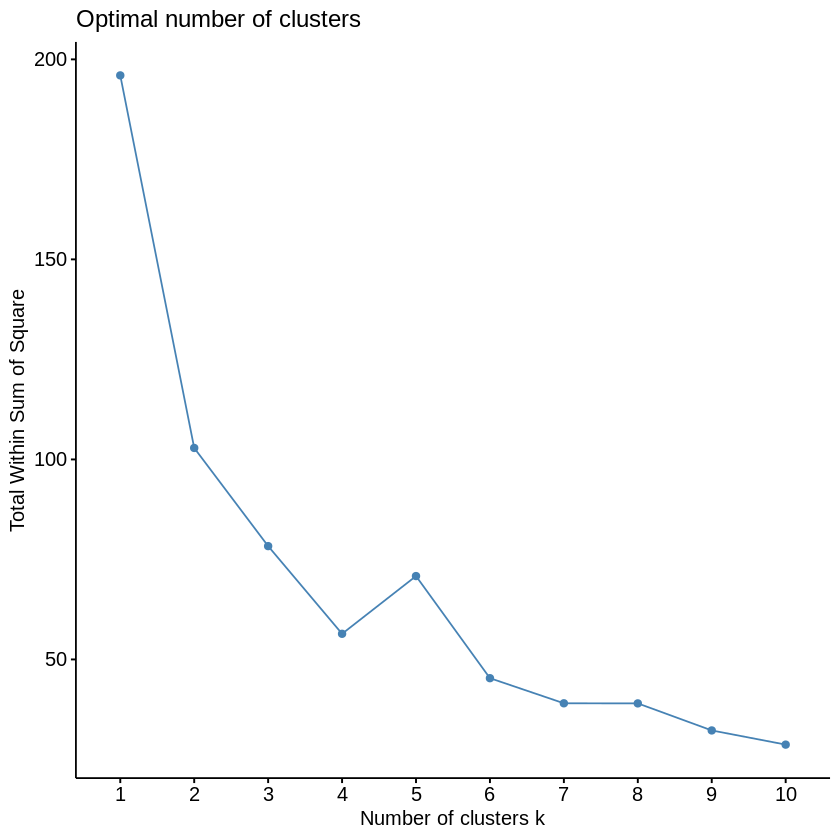

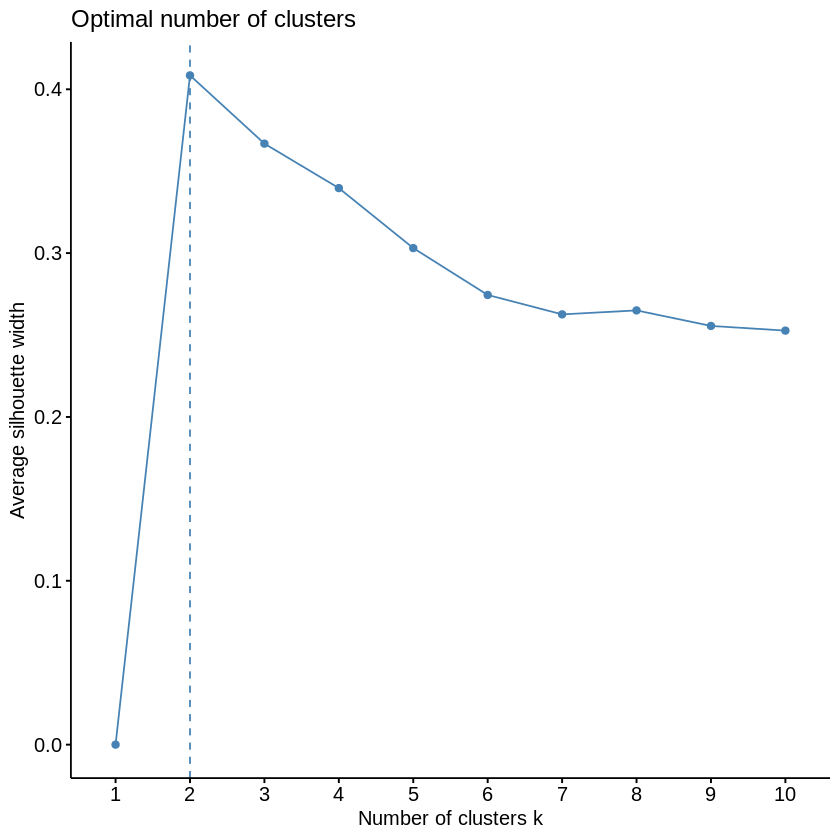

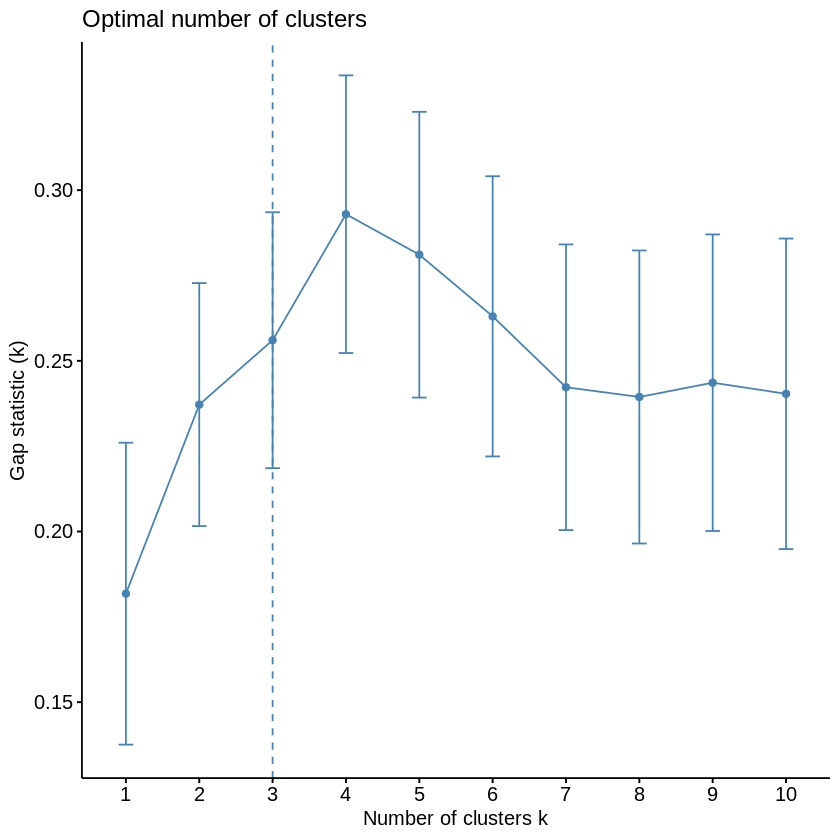

In [38]:
fviz_nbclust(arrests_USA_std, kmeans, method = "wss")
fviz_nbclust(arrests_USA_std, kmeans, method = "silhouette")
gap_stat = clusGap(arrests_USA_std, FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)
fviz_gap_stat(gap_stat)

Pour résumer:  

### Forces:  
- Intuitive
- Facile d'implémentation


### Faiblesses:  
- À priori sur le nombre de groupes à obtenir
- Pas de critères objectifs de création des clusters


# Pour aller plus loin  

Dans les sections précédentes nous avons vu les approches classiques de régression et de regroupement. Cependant il peut arriver que ces méthodes ne répondent pas de manière optimale à la question posée ou n'atteignent pas les hypothèses derrière les modèles utilisés cas échéant.  

Ici nous présenterons 2 méthodes supplémentaires, une en analyse de régression, une en analyse de regroupement, à savoir la **régression non-paramétrique** et le **tSNE** respectivement.  

## Les modèles additifs généralisés  

Il arrive que dans certains cas, en pratique, que les hypothèses derrière la régression linéaire ne soient pas atteintes. Par exemple, l'absence de linéarité entre une variable explicative et une variable réponse Dans ce cas, le choix du modèle de régression linéaire n'est pas adéquate.  
Pour surmonter ce problème, les **modèles additifs généralisés** ont été proposés pour par exemple modéliser une fonction non-linéare des prédicteurs. Ils s'avérent utiles dans un cadre prédictif lorsque l'on veut des méthodes à mi-chemin entre les approches **purement paramétriques** et des approches **totalement non-paramétriques**.  

Formellement le modèle peut s'écrire:  

$ \eta_i = \beta_{i0} + f_1(x_{i1}) + ... +f_p(x_{ip})$  

Dans le cadre où les fonctions sont des fonctions arbitraires, elles seront estimées grâce aux données, comme par exemple avec **des splines de lissage, des splines cubiques, des polynômes locaux**, etc. Les approches vues précédemment pour les GLM sont applicables aux GAM. Cependant ici, nous mettrons l'emphase sur l'implantation sous R et laisserons au lecteur intéressé le plaisir d'approfondir ces notions.  

This is mgcv 1.8-38. For overview type 'help("mgcv-package")'.



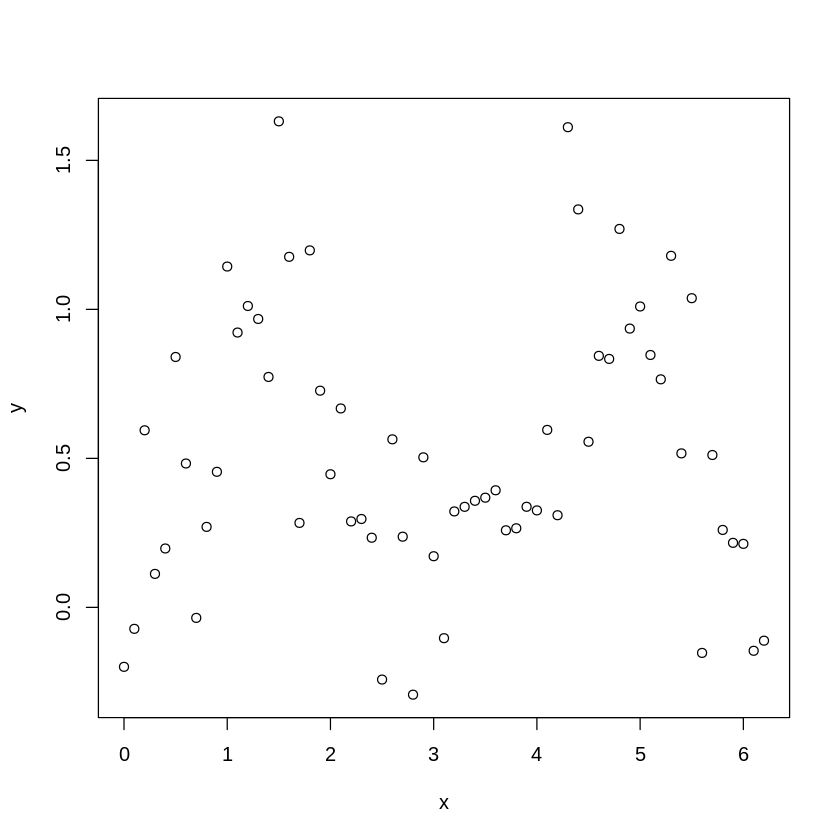

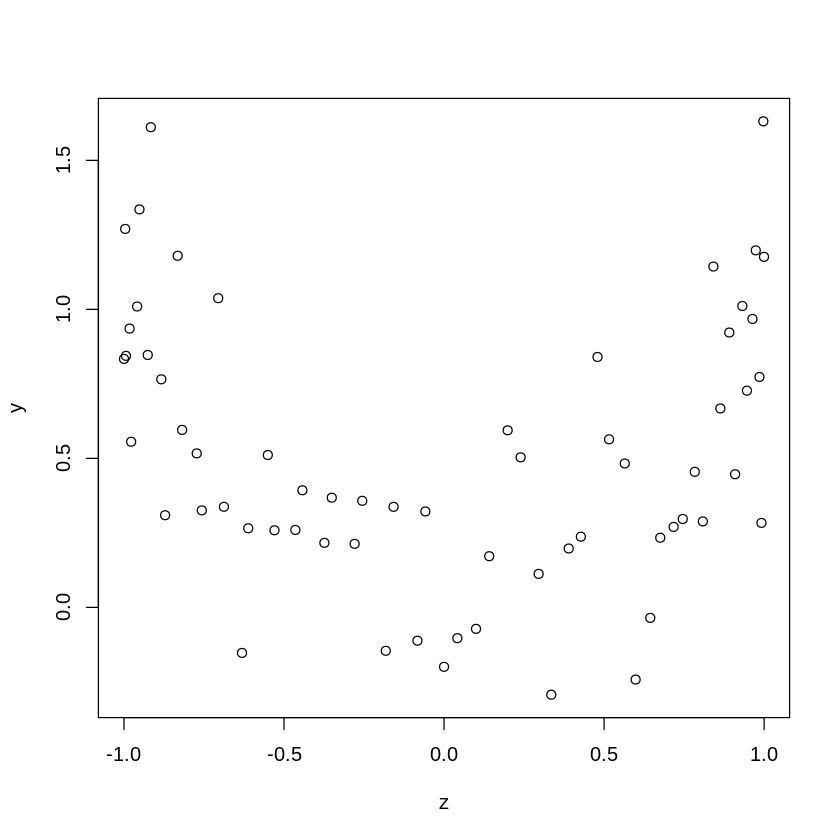

In [39]:
install.packages("mgcv", quiet=T)
library(mgcv, quietly=T)

x = seq(0,2*pi,0.1)
z = sin(x)
y = z^2 + rnorm(mean=0, sd=0.5*sd(z), n=length(x))
d = cbind.data.frame(x,y,z)

plot(x,y)
plot(z,y)

In [40]:
gam_model = gam(y~s(x)+s(z), data=d)
summary(gam_model)


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x) + s(z)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.51833    0.03981   13.02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
       edf Ref.df     F p-value    
s(x) 5.389  6.513 9.839  <2e-16 ***
s(z) 1.000  1.000 0.032   0.858    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.516   Deviance explained = 56.6%
GCV = 0.11313  Scale est. = 0.099866  n = 63

À vous de jouer !

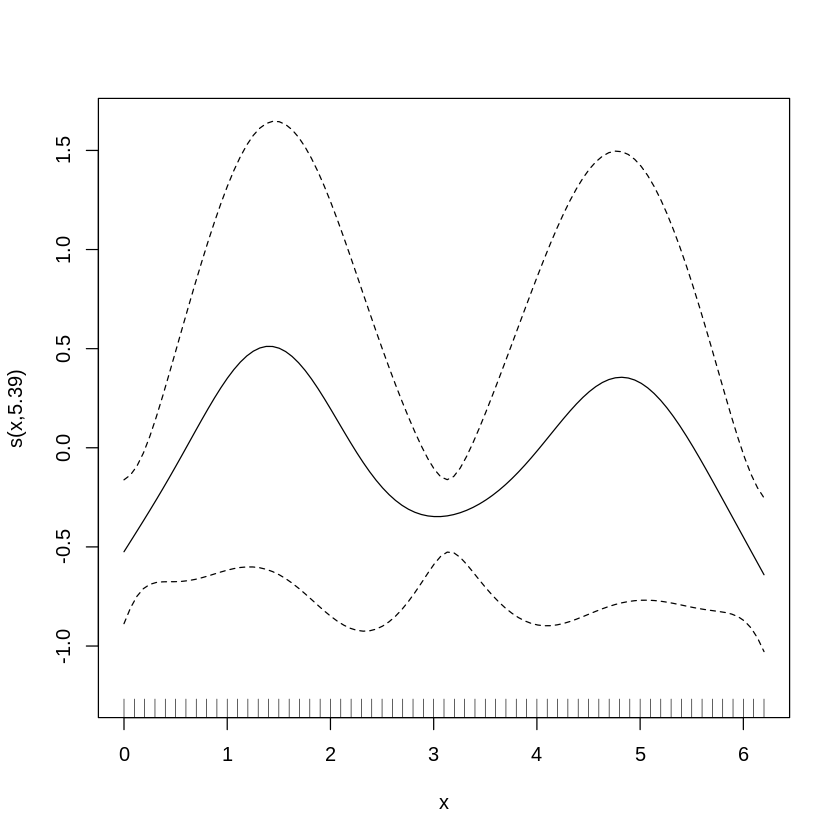

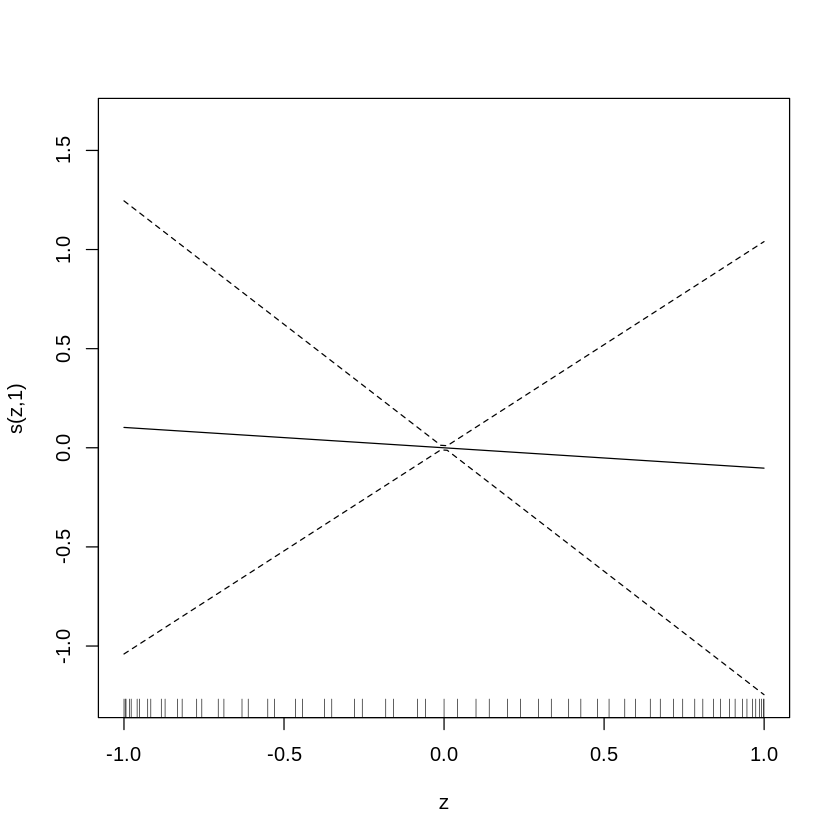

In [41]:
plot(gam_model)

## tSNE  

À la différence de l'ACP, la **tSNE** est une technique de réduction de la dimension non-linéaire et non paramétrique. Ainsi elle performe mieux pour traiter des problèmes de réduction de dimension **non-linéaire**.  

Pour être assez succint, la méthode est dite "probabiliste" depuis que l'on calcule la similarité sur la base de la probabilité **conditionnelle** entre 2 points, préservant la structure **locale** et **générale** des données. Cette probabilité conditionnelle s'effectue tout d'abord sur une loi normale centrée autour de chaque point. Ensuite la procédure précédente est effectuée, cette fois-ci, sur la base d'une loi de Cauchy pour tenir compte des structures plus générales des données. 

En maximisant une fonction de différence entre les probabilités obtenues on obtient l'appartenance aux groupes pour chaque point dans l'espace de départ considéré.

Assez pour la théorie, place à la pratique.


Performing PCA
Read the 50 x 4 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 10.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.00 seconds (sparsity = 0.719200)!
Learning embedding...
Iteration 50: error is 55.706558 (50 iterations in 0.00 seconds)
Iteration 100: error is 57.444523 (50 iterations in 0.00 seconds)
Iteration 150: error is 55.199686 (50 iterations in 0.00 seconds)
Iteration 200: error is 58.767521 (50 iterations in 0.00 seconds)
Iteration 250: error is 55.595116 (50 iterations in 0.00 seconds)
Iteration 300: error is 1.453785 (50 iterations in 0.00 seconds)
Iteration 350: error is 0.666099 (50 iterations in 0.00 seconds)
Iteration 400: error is 0.426532 (50 iterations in 0.00 seconds)
Iteration 450: error is 0.367693 (50 iterations in 0.00 seconds)
Iteration 500: error is 0.360674 (50 iterations in 0.00 seconds)
Fitting performed in 0.02 seconds.


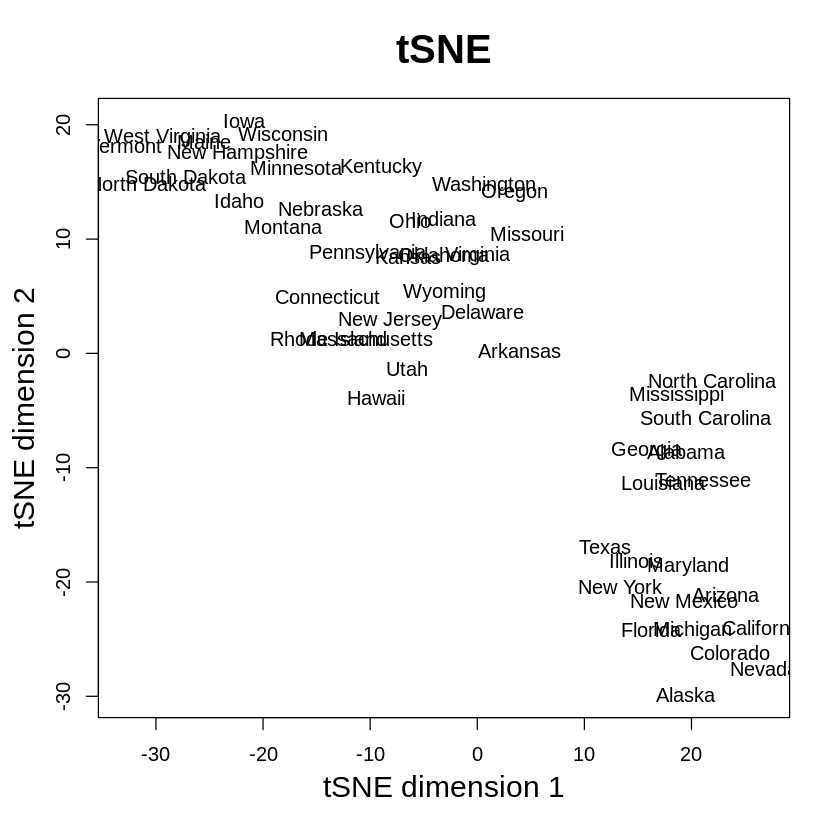

In [42]:
install.packages("Rtsne",quiet=T)
library(Rtsne, quietly=T)
#le paramètre perplexity peut être vu comme la variance du la distribution gaussienne sur laquette sont 
#calculées les densités (nombres de points autour du centre)
tsne = Rtsne(arrests_USA_std, dims = 2, perplexity=10, verbose=TRUE, max_iter = 500)

colors = rainbow(length(rownames(arrests_USA_std)))
names(colors) = rownames(arrests_USA_std)
par(mgp=c(2.5,1,0))
plot(tsne$Y, t='n', main="tSNE", xlab="tSNE dimension 1", ylab="tSNE dimension 2", "cex.main"=2, "cex.lab"=1.5)
text(tsne$Y, labels=rownames(arrests_USA_std))


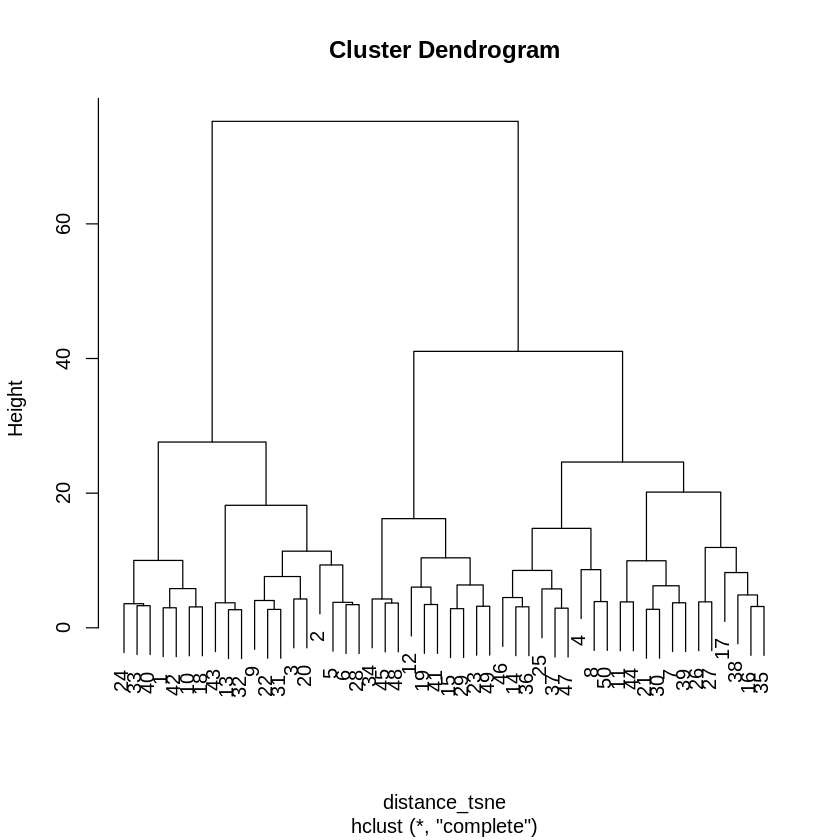

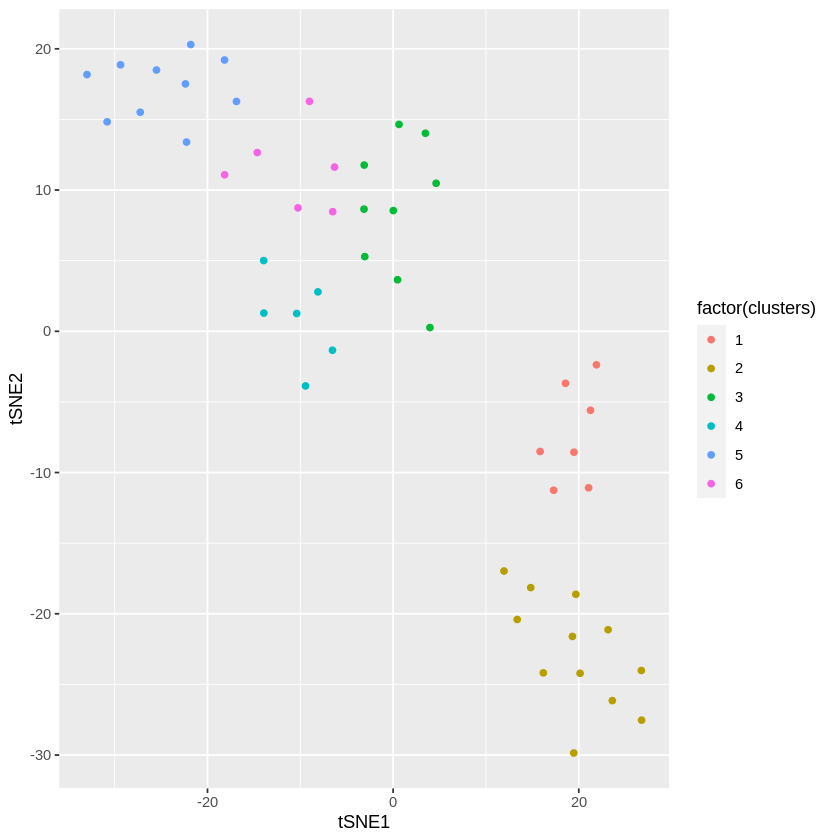

In [43]:
distance_tsne = dist(tsne$Y)
clusters_tsne = hclust(distance_tsne, method="complete")
plot(clusters_tsne)


cut_tree_tsne = cutree(clusters_tsne, h=20)
df_clusters_tsne = data.frame("clusters" = cut_tree_tsne, "tSNE1" = tsne$Y[,1], "tSNE2" = tsne$Y[,2])

ggplot(df_clusters_tsne, aes(x=tSNE1, y=tSNE2, colour=factor(clusters)))+geom_point()

Comparons avec les résultats obtenus avec l'ACP !